In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Introduction

* Most real-world ML applications focus on **supervised learning**, so most investment goes there

* However, **most available data is unlabeled**

  * We often have input features **X**
  * But we do not have target labels **y**

* This creates a major limitation for supervised approaches in practice

* **Yann LeCun**’s cake analogy explains the hierarchy of learning:

  * Unsupervised learning = **the cake**
  * Supervised learning = **the icing**
  * Reinforcement learning = **the cherry**

* Meaning:

  * Unsupervised learning captures the **core structure of intelligence**
  * Supervised and reinforcement learning build on top of it

* Unsupervised learning has **huge untapped potential** and is still underexplored

* Real-world example: **defective product detection in manufacturing**

  * Automated systems can easily collect **thousands of images per day**
  * This quickly creates a **large dataset**
  * But the dataset has **no labels**

* Training a supervised binary classifier requires:

  * Labeling each image as **“defective”** or **“normal”**
  * Human experts to manually inspect images

* Problems with manual labeling:

  * Very **time-consuming**
  * **Expensive**
  * **Tedious**

* Because of cost:

  * Only a **small subset** of data is labeled
  * The labeled dataset is **too small**
  * Resulting model performance is **poor**

* Additional issue:

  * Any change in the product requires **relabeling everything from scratch**

* This motivates the need for algorithms that can:

  * Learn directly from **unlabeled data**
  * Reduce or eliminate human labeling effort

* **Unsupervised learning** allows models to:

  * Exploit large volumes of unlabeled data
  * Discover hidden patterns and structure automatically

* A common unsupervised task already studied:

  * **Dimensionality reduction**

    * Reduce the number of features while preserving structure

* Additional important unsupervised learning tasks:

* **Clustering**

  * Objective: group **similar instances** into clusters
  * Widely used in:

    * Data analysis
    * Customer segmentation
    * Recommender systems
    * Search engines
    * Image segmentation
    * Semi-supervised learning
    * Dimensionality reduction
  * Helps understand the natural structure of data

* **Anomaly detection (outlier detection)**

  * Objective:

    * Learn what **normal data** looks like
    * Detect **abnormal instances**
  * Terminology:

    * Normal instances → **inliers**
    * Abnormal instances → **outliers / anomalies**
  * Common applications:

    * Fraud detection
    * Detecting defective products
    * Identifying new trends in time series
    * Removing outliers before training another model
  * Removing outliers can:

    * Significantly improve downstream model performance

* **Density estimation**

  * Objective:

    * Estimate the **probability density function (PDF)** of the data-generating process
  * Key idea:

    * Points in **low-density regions** are likely anomalies
  * Applications:

    * Anomaly detection
    * Data analysis
    * Data visualization

* Topics covered next in this chapter:

  * **k-means clustering**
  * **DBSCAN clustering**
  * **Gaussian Mixture Models (GMMs)**

* Gaussian Mixture Models can be used for:

  * Density estimation
  * Clustering
  * Anomaly detection


# Clustering Algorithms: k-means and DBSCAN

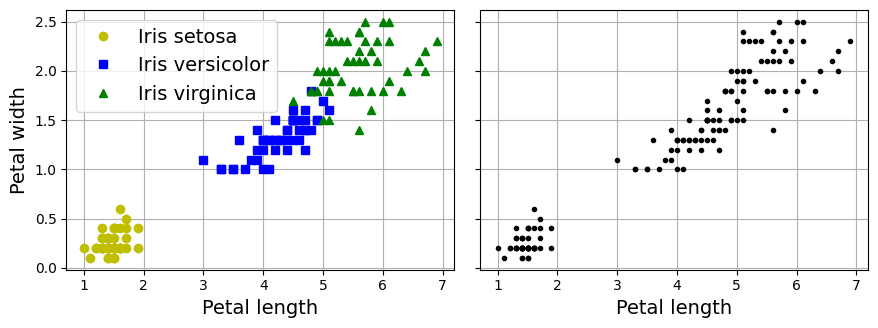

In [3]:
# extra code – this cell generates and saves Figure 9–1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

save_fig("classification_vs_clustering_plot")
plt.show()

* Intuitive idea of clustering:

  * Humans can naturally group **similar-looking objects** without knowing their exact labels
  * Exact identification (e.g., species name) may need an expert
  * Grouping similar instances does **not** require expert knowledge

* This intuitive grouping process is called **clustering**

* **Clustering definition**:

  * Task of identifying **similar instances**
  * Assigning them to **clusters (groups of similar instances)**

* Similarity does not mean identical:

  * Instances within a cluster can vary
  * They must be sufficiently alike according to some similarity measure

* Relation to classification:

  * Both assign instances to groups
  * Key difference:

    * Classification → **supervised learning**
    * Clustering → **unsupervised learning**

* In clustering:

  * No labels are available
  * The algorithm must discover structure on its own

* Example with the iris dataset:

  * With labels:

    * Each instance’s species is known
    * Suitable for classification algorithms

      * Logistic Regression
      * Support Vector Machines (SVMs)
      * Random Forest classifiers
  * Without labels:

    * Classification algorithms cannot be used
    * Clustering algorithms become necessary

* Visual intuition:

  * Some clusters are obvious to humans
  * Some clusters are subtle and hard to see visually

* Advantage of clustering algorithms:

  * Can exploit **all available features**
  * Can detect clusters that are not visually obvious

* Using all features (e.g., sepal length and width):

  * Clustering algorithms can correctly identify most groups
  * Example outcome:

    * Gaussian Mixture Models misclassify only a few instances

* Key idea:

  * Clustering can reveal **hidden structure** that humans may miss

* Major applications of clustering:

* Customer segmentation:

  * Group customers based on:

    * Purchase behavior
    * Website activity
  * Helps understand customer needs
  * Enables:

    * Targeted marketing
    * Personalized products
  * Useful for recommender systems:

    * Recommend content liked by users in the same cluster

* Data analysis:

  * Clustering helps explore new datasets
  * Enables analyzing each cluster separately
  * Reveals patterns and subpopulations in data

* Dimensionality reduction via clustering:

  * After clustering:

    * Measure each instance’s **affinity** to each cluster
  * Affinity:

    * Any measure of how well an instance fits a cluster
  * Feature transformation:

    * Original feature vector **x**
    * Replaced by vector of cluster affinities
  * If there are **k clusters**:

    * New feature vector is **k-dimensional**
  * Benefits:

    * Lower-dimensional representation
    * Preserves useful information for further processing

* Feature engineering:

  * Cluster affinities can be added as **extra features**
  * These features often improve model performance
  * Example use case:

    * Geographic clustering improved housing price prediction

* Anomaly detection (outlier detection):

  * Instances with:

    * Low affinity to all clusters
    * Likely to be anomalies
  * Example:

    * Website users with unusual behavior
    * Extremely high request rates
  * Clustering provides a natural way to detect abnormal patterns

* Semi-supervised learning:

  * Useful when only a **small number of labels** are available
  * Process:

    * Perform clustering
    * Propagate labels within each cluster
  * Benefits:

    * Dramatically increases labeled data
    * Improves supervised model performance

* Search engines:

  * Used for **similar-image search**
  * Workflow:

    * Cluster all images in the database
    * Similar images fall into the same cluster
    * For a query image:

      * Find its cluster
      * Return images from that cluster

* Image segmentation:

  * Pixels are clustered based on color similarity
  * Each pixel’s color is replaced by:

    * The mean color of its cluster
  * Benefits:

    * Reduces number of colors
    * Simplifies images
  * Useful for:

    * Object detection
    * Object tracking
    * Contour detection

* No universal definition of a cluster:

  * Meaning of a cluster depends on:

    * Context
    * Application
    * Algorithm choice

* Different clustering algorithms capture different structures:

  * Centroid-based clusters:

    * Instances grouped around a central point
  * Density-based clusters:

    * Continuous regions of high instance density
    * Arbitrary shapes
  * Hierarchical clustering:

    * Clusters of clusters
    * Multi-level structure

* Upcoming focus:

  * Two popular clustering algorithms:

    * k-means
    * DBSCAN

* Applications explored using these algorithms:

  * Nonlinear dimensionality reduction
  * Semi-supervised learning
  * Anomaly detection


**Note**: the next cell shows how a Gaussian mixture model (explained later in this chapter) can actually separate these clusters pretty well using all 4 features: petal length & width, and sepal length & width. This code maps each cluster to a class. Instead of hard coding the mapping, the code picks the most common class for each cluster using the `scipy.stats.mode()` function:

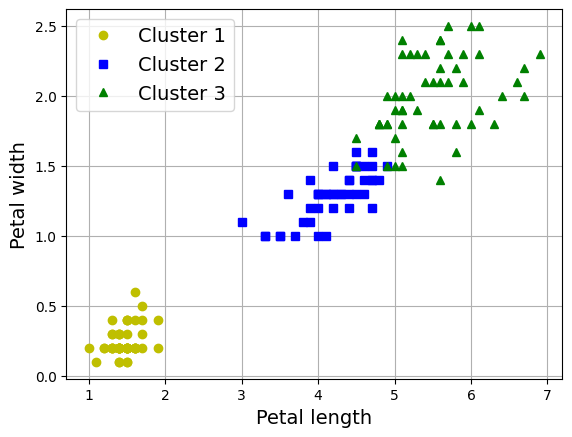

In [4]:
# extra code

import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

What's the ratio of iris plants we assigned to the right cluster?

In [5]:
(y_pred==y).sum() / len(y_pred)

np.float64(0.9666666666666667)

## k-means

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

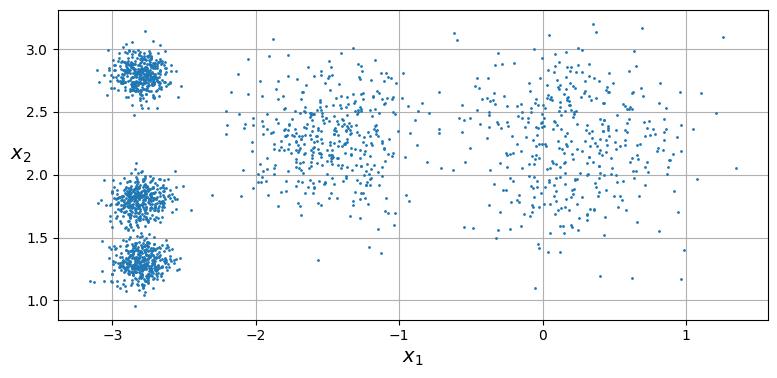

In [7]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")
plt.show()

* Dataset intuition:

  * The unlabeled dataset contains **five clearly visible blobs**
  * Each blob represents a natural group of similar instances

* Such datasets are well suited for **k-means clustering**

* **k-means algorithm**:

  * Simple and efficient clustering algorithm
  * Works very fast, often converging in **just a few iterations**
  * Especially effective when clusters are:

    * Compact
    * Well separated
    * Roughly spherical

* Historical background:

  * Proposed in **1957** by **Stuart Lloyd** at **Bell Labs**
  * Initially developed for **pulse-code modulation**
  * Published publicly in **1982**
  * A very similar algorithm was published in **1965** by **Edward W. Forgy**
  * Because of this, k-means is also called the **Lloyd–Forgy algorithm**

* Core idea of k-means:

  * Find the **center (centroid)** of each cluster
  * Assign each instance to the **closest centroid**
  * Repeat until cluster assignments stabilize

* Training k-means:

  * You must specify the number of clusters **k** in advance
  * In simple cases, k can be guessed by visual inspection
  * In real-world problems, choosing k is non-trivial and requires analysis

* Important distinction:

  * In clustering:

    * Labels are **cluster indices**
    * They are **not true class labels**
  * These labels are **not targets**
  * Clustering remains an **unsupervised learning task**

* After fitting k-means:

  * Each instance is assigned a cluster index
  * Predicted cluster labels are stored internally
  * The predicted labels and stored labels are identical

* Centroids:

  * k-means computes **k centroids**
  * Each centroid represents the mean position of all points in that cluster
  * Centroids define the structure of the clustering solution

* Predicting new data:

  * New instances can be assigned to clusters
  * Assignment rule:

    * Choose the cluster whose centroid is **closest**
  * This allows k-means to generalize to unseen data

* Decision boundaries:

  * k-means induces **Voronoi cells**
  * Each region contains points closest to a given centroid
  * The full partitioning of space is called a **Voronoi tessellation**

* Strengths of k-means:

  * Most points are correctly clustered when:

    * Clusters are well separated
    * Cluster sizes are similar
  * Very efficient and scalable

* Limitations of k-means:

  * Performs poorly when clusters have:

    * Very different diameters
    * Different densities
    * Non-spherical shapes
  * Assignment depends **only on distance to centroid**
  * Points near cluster boundaries are more likely to be mislabeled

* Hard clustering vs soft clustering:

  * **Hard clustering**:

    * Each instance is assigned to exactly one cluster
    * Standard k-means behavior
  * **Soft clustering**:

    * Each instance receives a **score per cluster**
    * Scores can represent:

      * Distance to centroid
      * Similarity / affinity

* Soft clustering with k-means:

  * k-means can provide distances to all centroids
  * For each instance:

    * One distance value per cluster
  * Smaller distance → stronger association with that cluster

* Interpretation of distances:

  * Each distance measures how far an instance is from a centroid
  * The closest centroid corresponds to the assigned cluster
  * Other distances provide additional structural information

* Dimensionality reduction using k-means:

  * Transforming data using distances to centroids:

    * Original feature vector → distance vector
  * If there are **k clusters**:

    * New representation is **k-dimensional**
  * This acts as a **nonlinear dimensionality reduction technique**

* Feature engineering with k-means:

  * Distances (or affinities) to centroids can be used as **extra features**
  * These features can improve performance of downstream models
  * This technique was successfully used earlier for regression tasks


In [8]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], shape=(2000,), dtype=int32)

In [9]:
y_pred is kmeans.labels_

True

In [10]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to (they are not targets, they are predictions):

In [11]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], shape=(2000,), dtype=int32)

In [12]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

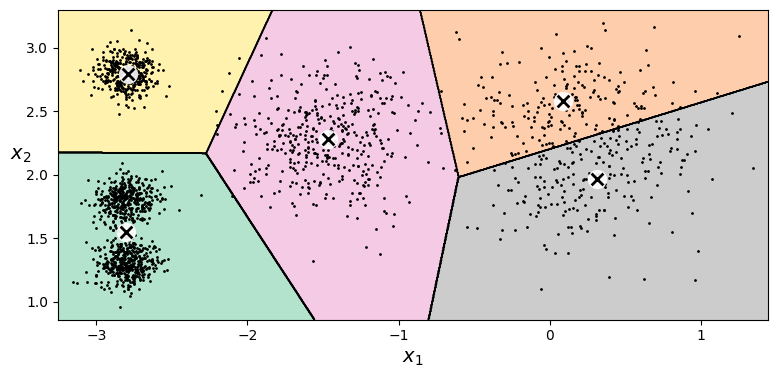

In [13]:
# extra code – this cell generates and saves Figure 9–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

In [14]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In [15]:
# extra code
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

## The k-means algorithm

>The computational complexity of the algorithm is generally linear with regard to the
number of instances m, the number of clusters k, and the number of dimensions n.
However, this is only true when the data has a clustering structure. If it does not, then in
the worst-case scenario the complexity can increase exponentially with the number of
instances. In practice, this rarely happens, and k-means is generally one of the fastest
clustering algorithms

The `KMeans` class uses an optimized initialization technique by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"` and `n_init=1`. More on this later in this chapter.

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:
* First initialize $k$ centroids randomly: e.g., $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

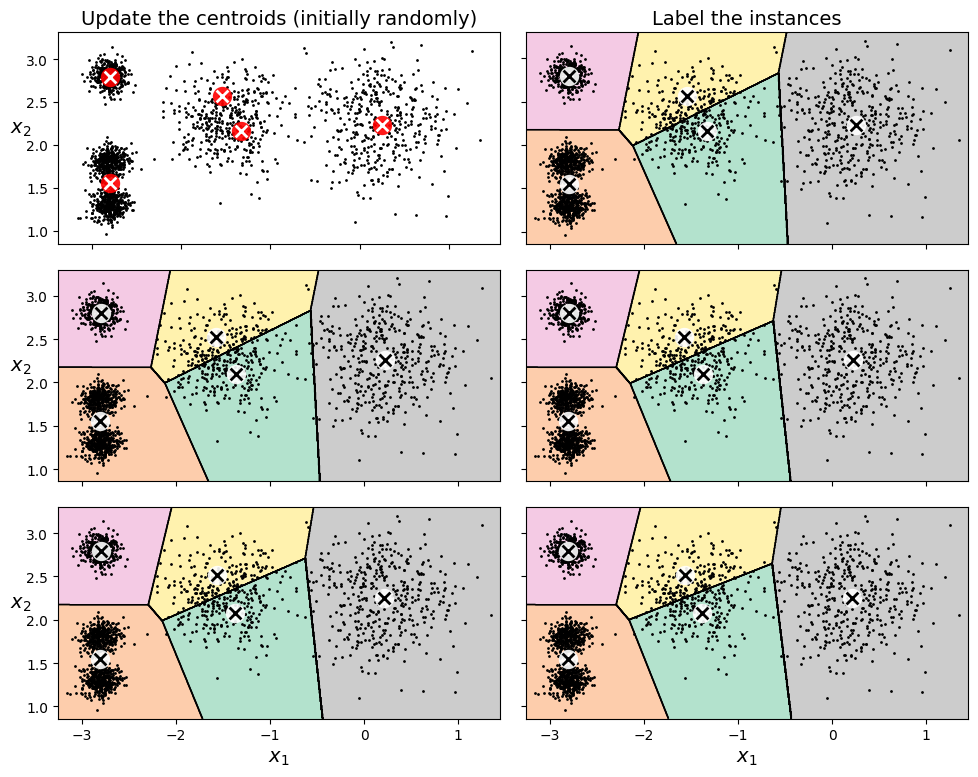

In [16]:
# extra code – this cell generates and saves Figure 9–4

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

* Core intuition behind k-means:

  * If centroids were known:

    * Each instance could be assigned to the **nearest centroid**
  * If labels were known:

    * Each centroid could be computed as the **mean of its assigned instances**
  * In reality:

    * Neither centroids nor labels are known initially

* k-means solves this using an **iterative process**

* Step-by-step working of k-means:

  * Initialize **k centroids randomly**

    * Common approach: randomly select k instances from the dataset
  * **Assignment step**:

    * Assign each instance to the cluster with the **closest centroid**
  * **Update step**:

    * Recompute each centroid as the **mean of all instances assigned to it**
  * Repeat:

    * Assignment → update → assignment → update
  * Stop when:

    * Centroids **no longer move** (or move negligibly)

* Objective function minimized by k-means:

  * **Mean Squared Distance (Inertia)** between instances and their closest centroids
  * At each iteration:

    * This value **never increases**
    * It either decreases or stays the same

* Convergence guarantee:

  * The objective function:

    * Is always **non-negative**
    * Strictly decreases or stays constant at each step
  * Therefore:

    * k-means is **guaranteed to converge**
    * Convergence happens in a **finite number of steps**
    * Usually in **very few iterations**

* Visual intuition of iterations:

  * Random centroid initialization
  * First assignment of instances
  * Centroid recomputation
  * Reassignment of instances
  * Process repeats
  * Often reaches a seemingly good solution in just a few iterations

* Important limitation:

  * Guaranteed convergence does **not** mean guaranteed optimal solution
  * k-means may converge to a **local optimum**
  * The final result depends heavily on:

    * Initial centroid placement

* Effect of poor initialization:

  * Different random initializations can lead to:

    * Suboptimal cluster boundaries
    * Incorrect splitting or merging of clusters
  * Some solutions may look reasonable but are **not globally optimal**

* Key reason for suboptimal solutions:

  * The k-means objective function is **non-convex**
  * Multiple local minima exist

* Practical implication:

  * Initialization quality is **crucial** for k-means performance
  * Bad initialization → bad clustering, even though convergence is reached

* Motivation for improved initialization:

  * Reduce sensitivity to randomness
  * Increase chance of converging to a **better (near-global) optimum**
  * Leads to techniques designed to initialize centroids more intelligently


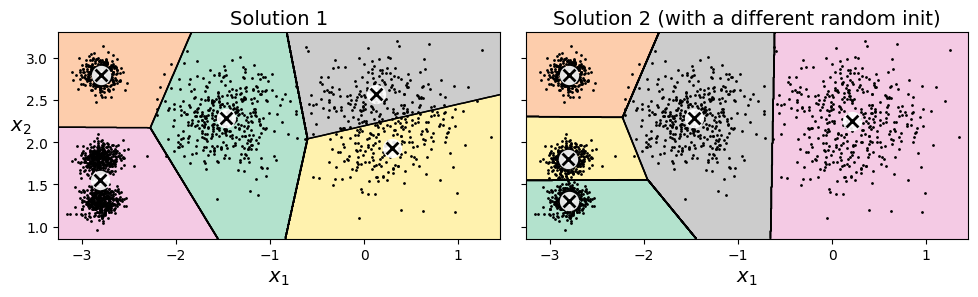

In [17]:
# extra code – this cell generates and saves Figure 9–5

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

## Centroid initialization methods

In [18]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

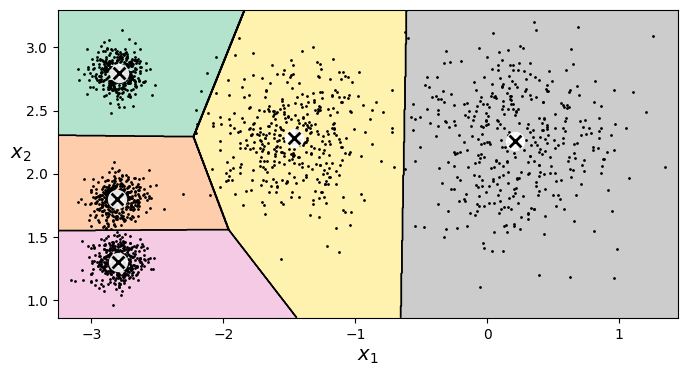

In [19]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [20]:
kmeans.inertia_

211.5985372581684

In [21]:
kmeans_rnd_init1.inertia_  # extra code

219.58201503602282

In [22]:
kmeans_rnd_init2.inertia_  # extra code

211.5985372581684

In [23]:
# extra code
X_dist = kmeans.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

np.float64(211.59853725816856)

In [24]:
kmeans.score(X)

-211.5985372581684

* Improving k-means initialization can significantly reduce the risk of converging to a poor local optimum

* Manual centroid initialization:

  * If approximate centroid locations are already known:

    * From prior knowledge
    * From another clustering algorithm
  * You can directly provide centroids to k-means

* This is done by:

  * Passing a NumPy array of centroids to the `init` hyperparameter
  * Setting `n_init = 1` since no randomness is needed

* Effect:

  * Deterministic behavior
  * Faster convergence
  * Higher chance of reaching a good solution

* Multiple random initializations strategy:

  * Another common approach is to:

    * Run k-means multiple times
    * Each time with a different random initialization
  * Select the **best solution** among them

* Controlled by the **`n_init` hyperparameter**

  * `n_init` = number of times k-means is run from scratch
  * Default value in scikit-learn is **10**

* During `fit()`:

  * The full k-means algorithm runs `n_init` times
  * Each run may converge to a different solution

* Model selection criterion:

  * k-means selects the **best run** using a performance metric
  * This metric is called **inertia**

* Inertia definition:

  * Inertia = sum of squared distances between each instance and its closest centroid

* Mathematical form:

  * Inertia = Σᵢ minⱼ ‖ xᵢ − μⱼ ‖²

    * xᵢ = data point i
    * μⱼ = centroid j

* Interpretation:

  * Lower inertia → tighter, more compact clusters
  * Higher inertia → poorer clustering

* Practical comparison:

  * Different clustering solutions can have very different inertia values
  * k-means always prefers the solution with the **lowest inertia**

* Selection behavior:

  * After `n_init` runs:

    * k-means keeps the model with minimum inertia
  * Only fails if:

    * All `n_init` random initializations are unlucky (rare in practice)

* Accessing inertia in code:

  * The final model’s inertia is stored in:

    * `inertia_` attribute

* This allows:

  * Quantitative comparison of clustering quality
  * Debugging and model evaluation

* Scoring behavior:

  * The `score()` method returns:

    * **negative inertia**

* Reason:

  * Scikit-learn enforces the rule:

    * “greater score = better model”
  * Since lower inertia is better:

    * Score is defined as `- inertia`

* Key takeaways:

  * Initialization strongly affects k-means results
  * Providing good initial centroids is ideal when possible
  * Otherwise:

    * Use multiple initializations
    * Let inertia guide selection
  * Always remember:

    * k-means minimizes inertia, not necessarily semantic correctness


---

* **K-Means++** is an important improvement over standard k-means initialization

* It was proposed in **2006** by **David Arthur** and **Sergei Vassilvitskii**

* Motivation for K-Means++:

  * Standard k-means uses **random initialization**
  * Poor initialization can lead to:

    * Slow convergence
    * Suboptimal (local minimum) solutions
  * K-Means++ aims to:

    * Choose **better initial centroids**
    * Reduce sensitivity to randomness

* Key idea of K-Means++:

  * Initialize centroids so that they are **far apart**
  * Encourages better coverage of the data space
  * Makes k-means **much less likely** to converge to a bad local optimum

* Trade-off:

  * K-Means++ adds a small amount of extra computation during initialization
  * This cost is:

    * Negligible compared to total training time
    * More than compensated by fewer failed runs and better solutions

* Practical impact:

  * Drastically reduces the number of times k-means needs to be rerun
  * Increases probability of finding a near-optimal or optimal clustering

* K-Means++ initialization algorithm:

* Step 1:

  * Choose the first centroid ( c^{(1)} )
  * Selected **uniformly at random** from the dataset

* Step 2:

  * For each data point ( x ), compute:

    * ( D(x) ): distance from ( x ) to the **nearest already chosen centroid**
  * Select the next centroid ( c^{(i)} ) with probability:
    $$[
    P(x^{(i)}) = \frac{D(x^{(i)})^2}{\sum_{j=1}^{m} D(x^{(j)})^2}
    ]$$
  * Interpretation:

    * Points **farther away** from existing centroids are **much more likely** to be chosen
    * Encourages diversity among centroids

* Step 3:

  * Repeat Step 2 until **k centroids** have been selected

* Why this works well:

  * Prevents centroids from being initialized too close to each other
  * Leads to:

    * Faster convergence
    * Lower inertia
    * Better clustering quality

* Default behavior in scikit-learn:

  * The `KMeans` class uses **K-Means++ by default**
  * This is usually the **best choice**

* Forcing random initialization:

  * Set:

    * `init = "random"`
  * This uses the original random centroid selection
  * Rarely recommended in practice

* Key takeaway:

  * K-Means++ is almost always superior to random initialization
  * Better initialization → better clustering → fewer retries
  * This is why it is the **default standard** for k-means today


In [25]:
# extra code
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

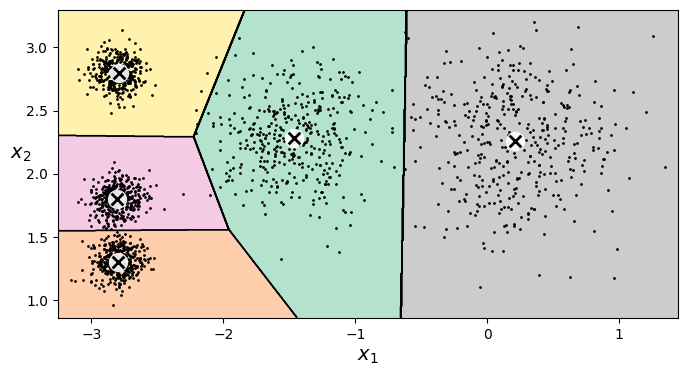

In [26]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.
When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

## Accelerated k-means and mini-batch k-means

In [27]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [28]:
minibatch_kmeans.inertia_

211.65899374574312

In [29]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

In [30]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [31]:
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype='float32', mode='write',
                     shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()

In [32]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,
                                   n_init=3, random_state=42)
minibatch_kmeans.fit(X_memmap)

MiniBatchKMeans(batch_size=10, n_clusters=10, n_init=3, random_state=42)

100/100

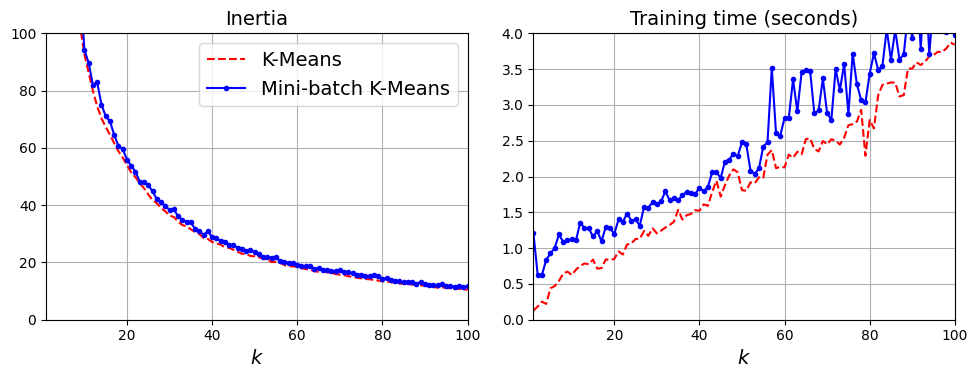

In [33]:
# extra code – this cell generates and saves Figure 9–6

from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

save_fig("minibatch_kmeans_vs_kmeans_plot")
plt.show()

* Two major performance-oriented variants of k-means:

  * **Accelerated k-means (Elkan’s algorithm)**
  * **Mini-batch k-means**

* **Accelerated k-means (Elkan’s algorithm)**:

  * Proposed in **2003** by **Charles Elkan**
  * Goal:

    * Speed up k-means on **large datasets**
    * Especially when there are **many clusters**
  * Key optimization idea:

    * Avoid unnecessary distance computations
  * Technique used:

    * Exploits the **triangle inequality**

      * A straight line is always the shortest distance between two points
  * How it works:

    * Maintains **lower and upper bounds** on distances:

      * Between instances and centroids
    * Uses these bounds to:

      * Skip distance calculations that cannot change cluster assignment
  * Performance characteristics:

    * Can significantly accelerate training on some datasets
    * Effectiveness depends strongly on:

      * Dataset geometry
      * Number of clusters
      * Distribution of points
  * Limitations:

    * Does **not always speed up** training
    * In some cases, it can even **slow down** training
  * Usage in scikit-learn:

    * Enable by setting:

      * `algorithm = "elkan"`
  * Practical note:

    * Worth experimenting with
    * Not guaranteed to help in all cases

* **Mini-batch k-means**:

  * Proposed in **2010** by **David Sculley**
  * Motivation:

    * Standard k-means is expensive for very large datasets
    * Full dataset is processed at every iteration
  * Core idea:

    * Use **small random subsets (mini-batches)** of the data
    * Update centroids **incrementally**
    * Each iteration makes only a **small adjustment** to centroids

* How mini-batch k-means works:

  * Randomly sample a mini-batch of instances
  * Assign them to the nearest centroids
  * Update centroids based only on this mini-batch
  * Repeat for many iterations

* Advantages of mini-batch k-means:

  * Much **faster** than standard k-means

    * Typically **3–4× speedup**
  * Can scale to:

    * Massive datasets
    * Datasets that **do not fit in memory**
  * Suitable for:

    * Online learning
    * Large-scale clustering

* Implementation in scikit-learn:

  * Provided via the `MiniBatchKMeans` class
  * API is very similar to `KMeans`
  * Easy drop-in replacement for large datasets

* Handling datasets that do not fit in memory:

  * Option 1:

    * Use memory-mapped arrays (`memmap`)
  * Option 2:

    * Feed mini-batches manually using:

      * `partial_fit()`
  * Caveat with `partial_fit()`:

    * Requires more work
    * You must:

      * Handle multiple initializations yourself
      * Manually select the best solution

* Quality trade-off:

  * Mini-batch k-means optimizes speed, not perfection
  * Resulting inertia is:

    * Usually **slightly worse** than regular k-means
  * Difference in inertia:

    * Small
    * Often acceptable in practice

* Empirical observation:

  * Regular k-means:

    * Lower inertia
    * Slower
  * Mini-batch k-means:

    * Slightly higher inertia
    * Much faster (≈3.5× in experiments)

* Key takeaways:

  * Use **Elkan’s k-means**:

    * When distance computations dominate
    * Dataset geometry is favorable
  * Use **MiniBatchKMeans**:

    * For very large datasets
    * When speed and scalability matter more than minimal inertia
  * Choice depends on:

    * Dataset size
    * Memory constraints
    * Accuracy vs speed trade-off


## Finding the optimal number of clusters

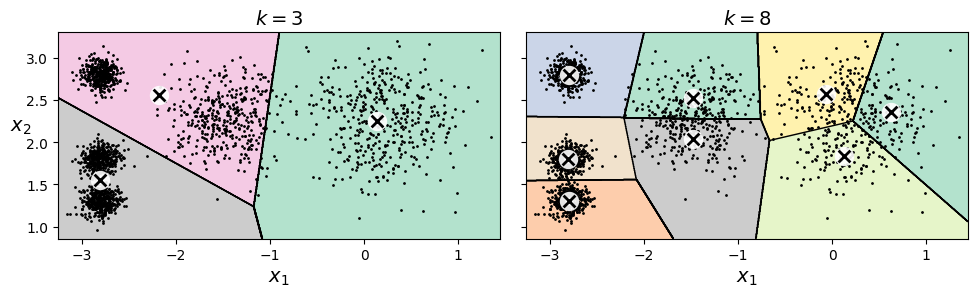

In [34]:
# extra code – this cell generates and saves Figure 9–7

kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [35]:
kmeans_k3.inertia_

653.2167190021553

In [36]:
kmeans_k8.inertia_

119.22484592677125

* Choosing the number of clusters **k** is a critical problem in k-means

* In simple cases:

  * k can be inferred by visual inspection

* In real-world datasets:

  * The correct value of k is usually **not obvious**
  * A wrong choice of k can lead to **poor clustering results**

* Effects of choosing the wrong k:

  * **k too small**:

    * Distinct clusters get **merged**
    * Important structure is lost
  * **k too large**:

    * Natural clusters get **split into multiple fragments**
    * Over-segmentation occurs

* Initial intuition:

  * One might try to choose k by minimizing **inertia**

* Inertia definition reminder:

  * Inertia = sum of squared distances between each instance and its closest centroid

* Why inertia alone is a bad criterion for choosing k:

  * Inertia **always decreases** as k increases
  * More clusters → centroids are closer to data points
  * Therefore:

    * Lower inertia does **not necessarily** mean better clustering

* Example behavior:

  * k = 3 → high inertia (poor fit)
  * k = 5 → much lower inertia (good fit)
  * k = 8 → even lower inertia
  * Despite lower inertia at k = 8:

    * Clustering quality is worse than k = 5

* Key insight:

  * Minimizing inertia blindly encourages:

    * Overfitting
    * Excessive number of clusters

* Elbow method:

  * Plot **inertia vs number of clusters k**
  * Analyze how inertia decreases as k increases

* Shape of the inertia curve:

  * Steep decrease for small k
  * Gradual decrease for larger k
  * Curve often resembles an **arm**

* Elbow point:

  * The **inflexion point** where the rate of decrease changes sharply
  * Indicates diminishing returns from adding more clusters

* Interpretation of the elbow:

  * k before the elbow → model is underfitting
  * k after the elbow → marginal improvement, possible overfitting
  * Elbow location is a **reasonable compromise**

* Practical heuristic:

  * Choose k at the elbow:

    * Smaller k → dramatic loss in quality
    * Larger k → little gain, unnecessary complexity

* Limitation of the elbow method:

  * Elbow is sometimes:

    * Ambiguous
    * Not clearly defined
  * Requires judgment and domain understanding

* Key takeaway:

  * Inertia is useful for **comparing models**
  * Inertia alone cannot determine the best k
  * The elbow method helps balance:

    * Model simplicity
    * Clustering quality


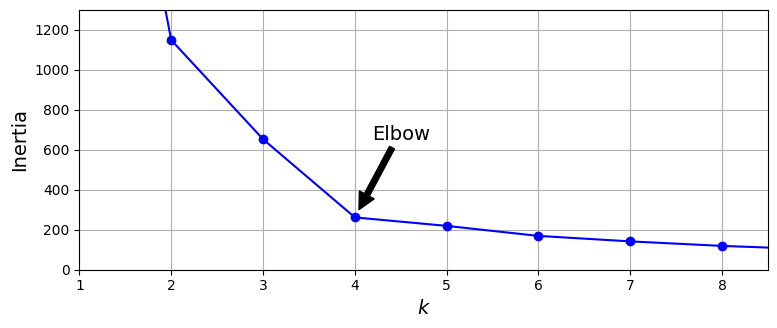

In [37]:
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("inertia_vs_k_plot")
plt.show()

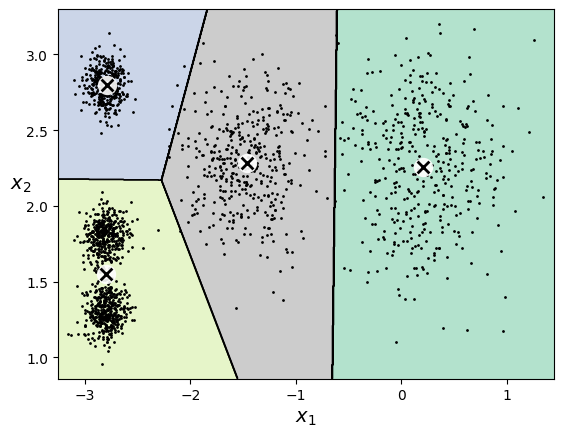

In [38]:
# extra code
plot_decision_boundaries(kmeans_per_k[4 - 1], X)
plt.show()

* The elbow method for choosing **k** is:

  * Simple
  * Fast
  * But **coarse** and sometimes ambiguous

* A more precise method for selecting **k**:

  * Use the **silhouette score**
  * Trade-off:

    * More informative
    * More computationally expensive

* Silhouette score definition:

  * It is the **mean silhouette coefficient** over all instances

* Silhouette coefficient for a single instance:

  * Defined as:
    $$[
    s = \frac{b - a}{\max(a, b)}
    ]$$
  * Where:

    * ( a ) = mean distance to other instances in the **same cluster**

      * Mean intra-cluster distance
    * ( b ) = mean distance to instances in the **nearest neighboring cluster**

      * The closest cluster excluding the instance’s own cluster

* Range of silhouette coefficient:

  * ( $-1 \le s \le 1$ )

* Interpretation of silhouette coefficient values:

  * ( $s \approx +1$ ):

    * Instance is well inside its own cluster
    * Far from other clusters
  * ( $s \approx 0$ ):

    * Instance lies close to a cluster boundary
  * ( $s \approx -1$ ):

    * Instance is likely assigned to the **wrong cluster**

* Silhouette score interpretation:

  * Higher score → better-defined clusters
  * Lower score → overlapping or poorly separated clusters

* Computing silhouette score in practice:

  * Requires:

    * All data points
    * Their assigned cluster labels
  * Returns:

    * A single scalar measuring overall clustering quality

* Comparing silhouette scores for different k:

  * Provides a **richer signal** than inertia
  * Does not monotonically improve as k increases
  * Helps detect:

    * Over-clustering
    * Under-clustering

* Observations when comparing k values:

  * k = 4:

    * Very strong silhouette score
  * k = 5:

    * Slightly lower score
    * Still very good
  * k = 6 or 7:

    * Noticeably worse scores
  * This distinction is **not visible** when using inertia alone

* Advantage over inertia:

  * Silhouette score balances:

    * Cluster compactness
    * Cluster separation
  * Penalizes excessive splitting of clusters

* Silhouette diagram:

  * A visualization of **individual silhouette coefficients**
  * Instances are:

    * Grouped by cluster
    * Sorted by coefficient value within each cluster

* Structure of a silhouette diagram:

  * One **knife-shaped region per cluster**
  * Height of a region:

    * Number of instances in that cluster
  * Width of the region:

    * Magnitude of silhouette coefficients
    * Wider → better cluster quality

* Mean silhouette score indicator:

  * Shown as a **vertical dashed line**
  * Represents average silhouette score across all instances

* Diagnosing bad clusters using the diagram:

  * If many instances:

    * Fall to the **left of the dashed line**
    * Have low or negative coefficients
  * Then:

    * The cluster is poorly separated
    * Instances are too close to other clusters

* Cluster quality observations:

  * k = 3:

    * Several poor clusters
    * Many instances have low coefficients
  * k = 6:

    * Over-segmentation
    * Weak cluster separation
  * k = 4 or 5:

    * Most instances have high coefficients
    * Clusters are well separated

* Cluster size considerations:

  * k = 4:

    * One cluster is significantly larger than others
  * k = 5:

    * Cluster sizes are more balanced

* Practical decision insight:

  * Even if k = 4 has a slightly higher mean silhouette score:

    * k = 5 may be preferable
    * Produces more evenly sized clusters

* Key takeaway:

  * Silhouette analysis provides:

    * Quantitative score
    * Qualitative visual diagnostics
  * Best k is not always the one with:

    * Highest silhouette score alone
  * Final choice should consider:

    * Separation quality
    * Cluster balance
    * Practical usefulness


In [39]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

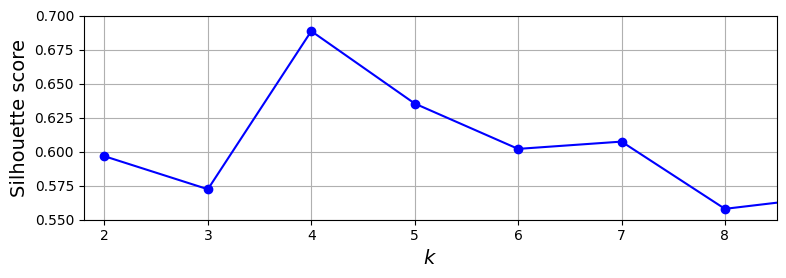

In [41]:
# extra code – this cell generates and saves Figure 9–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
save_fig("silhouette_score_vs_k_plot")
plt.show()

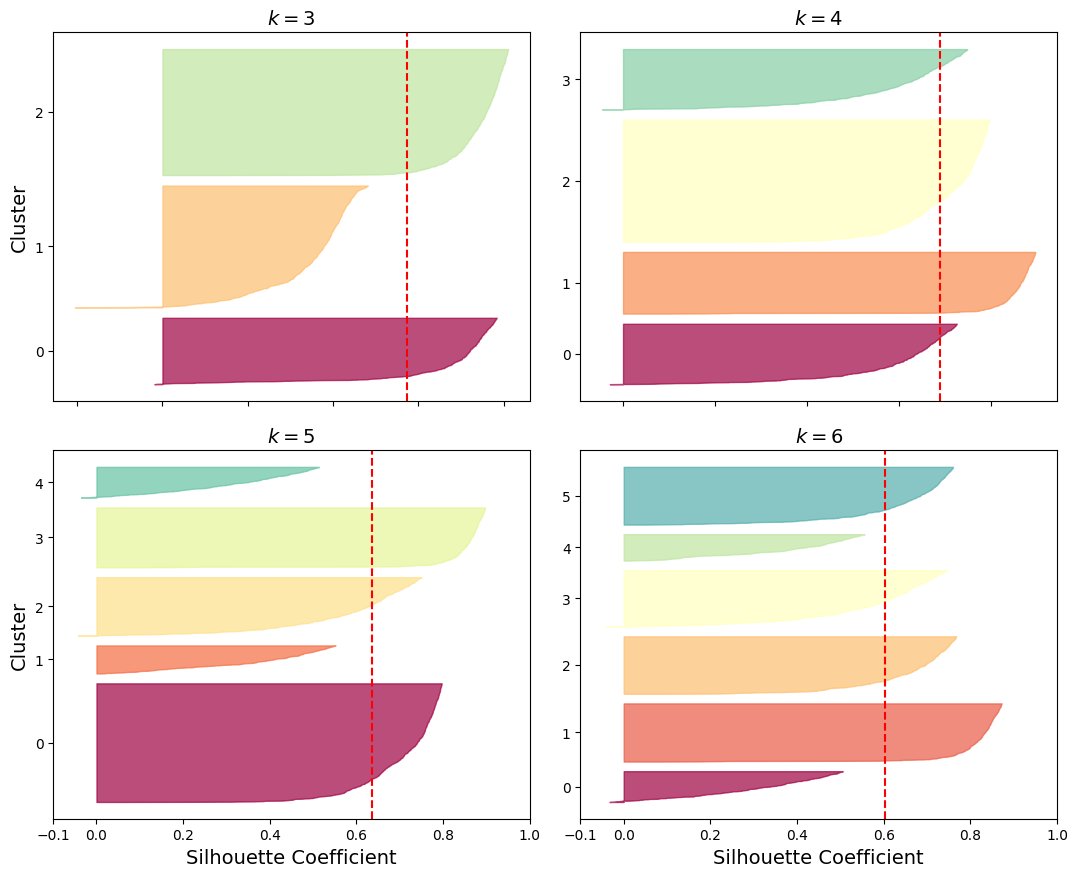

In [43]:
# extra code – this cell generates and saves Figure 9–10

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

save_fig("silhouette_analysis_plot")
plt.show()

## Limits of k-means

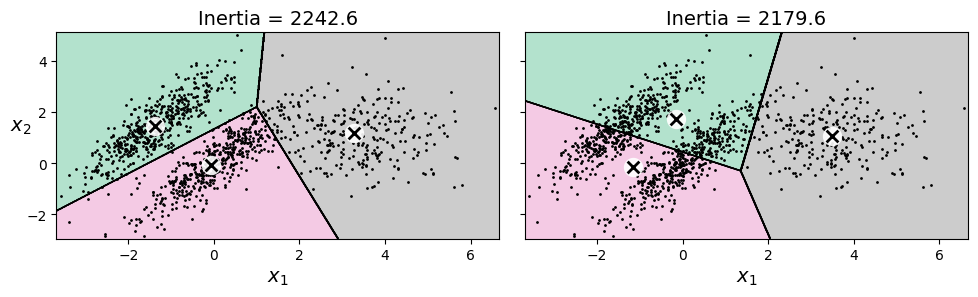

In [44]:
# extra code – this cell generates and saves Figure 9–11

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

save_fig("bad_kmeans_plot")
plt.show()

> It is important to scale the input features (see Chapter 2) before you run k-means, or the
clusters may be very stretched and k-means will perform poorly. Scaling the features does
not guarantee that all the clusters will be nice and spherical, but it generally helps k-means

* Despite being **fast, simple, and scalable**, k-means has important limitations

* Practical drawbacks of k-means:

  * Must be run **multiple times** to avoid poor local optima
  * Requires specifying the number of clusters **k in advance**

    * Choosing k is often difficult and time-consuming

* Structural limitations of k-means:

  * Assumes clusters are:

    * Roughly **spherical**
    * Of **similar size**
    * Of **similar density**
  * Performs poorly when these assumptions are violated

* Situations where k-means struggles:

  * Clusters with **varying sizes**
  * Clusters with **different densities**
  * **Non-spherical** (e.g., elongated or elliptical) clusters
  * Clusters with different orientations

* Example: elliptical clusters

  * Dataset contains:

    * Three **ellipsoidal clusters**
    * Different dimensions
    * Different densities
    * Different orientations
  * k-means produces poor results on such data

* Analysis of k-means solutions on elliptical data:

  * One solution may look slightly better:

    * But still misassigns a significant portion of points
    * Example: ~25% of a cluster incorrectly assigned
  * Another solution may look much worse:

    * Even though it has **lower inertia**

* Important insight about inertia:

  * Lower inertia does **not guarantee** better clustering
  * k-means optimizes distance to centroids, not true cluster structure
  * Inertia can favor incorrect solutions

* Core reason for failure:

  * k-means uses:

    * Euclidean distance to centroids
  * Cannot adapt to:

    * Anisotropic (direction-dependent) cluster shapes
    * Unequal spread of data

* Algorithm selection matters:

  * No single clustering algorithm works best for all datasets
  * The data geometry should guide algorithm choice

* Alternative for elliptical clusters:

  * **Gaussian Mixture Models (GMMs)** handle:

    * Elliptical shapes
    * Different sizes
    * Different densities
    * Different orientations
  * GMMs model clusters as probability distributions instead of rigid centroids

* Key takeaway:

  * k-means is excellent for:

    * Large-scale
    * Well-separated
    * Spherical clusters
  * For complex cluster shapes:

    * More flexible models are required
  * Always match the clustering algorithm to the **data structure**, not convenience


## Using Clustering for Image Segmentation

* **Image segmentation**:

  * Task of partitioning an image into multiple meaningful segments
  * Each pixel is assigned to exactly one segment

* Main variants of image segmentation:

* **Color segmentation**:

  * Pixels with **similar colors** are grouped into the same segment
  * Uses only color information
  * Ignores object identity and boundaries
  * Sufficient for many practical tasks
  * Example use case:

    * Satellite image analysis
    * Estimating forest area by grouping green pixels

* **Semantic segmentation**:

  * Pixels are grouped by **object category**
  * All pixels belonging to the same class share one label
  * Example:

    * All pedestrian pixels → “pedestrian” segment
  * Multiple objects of the same class share the same segment

* **Instance segmentation**:

  * Pixels are grouped by **individual object**
  * Each object instance gets its own segment
  * Example:

    * Each pedestrian gets a separate segment
  * More fine-grained than semantic segmentation

* State of the art:

  * Semantic and instance segmentation are typically solved using:

    * Deep convolutional neural networks
  * These approaches are:

    * Powerful
    * Complex
    * Computationally expensive

* Focus here:

  * **Color segmentation**
  * Much simpler
  * Can be solved using **k-means clustering**

* Image representation:

  * Loaded image is a **3D NumPy array**
  * Shape:

    * (height, width, channels)
  * For RGB images:

    * Channels = 3 (Red, Green, Blue)

* Pixel-level representation:

  * Each pixel is a **3D feature vector**:

    * ([R, G, B])
  * Each value is:

    * Unsigned 8-bit integer
    * Range: 0 to 255

* Possible variations in image channels:

  * Grayscale images:

    * 1 channel
  * Images with transparency:

    * Extra alpha channel
  * Satellite images:

    * Additional spectral channels (e.g., infrared)

* Preparing image data for k-means:

  * Reshape the image array:

    * From (height, width, 3)
    * To (number_of_pixels, 3)
  * Each row represents the color of one pixel

* Applying k-means for color segmentation:

  * Run k-means on the list of RGB values
  * Number of clusters = number of colors in the segmented image
  * Each cluster center represents:

    * A **mean color**

* Constructing the segmented image:

  * For each pixel:

    * Replace its RGB value with the RGB value of its cluster centroid
  * This assigns each pixel the color of its cluster
  * Reshape back to the original image dimensions

* Role of NumPy advanced indexing:

  * Cluster labels are used as indices
  * Each pixel’s label maps directly to its centroid color

* Effect of number of clusters:

  * More clusters:

    * Preserves more color detail
  * Fewer clusters:

    * Produces stronger color simplification
    * Can merge visually distinct regions

* Important limitation observed:

  * k-means prefers **clusters of similar sizes**
  * Small but visually important objects may be ignored

* Example consequence:

  * A small object with a distinctive color:

    * May not get its own cluster
  * Its pixels may be merged with background colors
  * This happens even if the color is very different

* Reason for this behavior:

  * k-means minimizes overall inertia
  * Giving a cluster to a very small region:

    * Does not significantly reduce inertia
  * So k-means sacrifices small clusters

* Key takeaway:

  * k-means works well for:

    * Global color simplification
    * Dominant regions
  * It is not ideal for:

    * Small objects
    * Semantically meaningful regions
  * Choice of number of clusters is critical for good segmentation results


In [45]:
# extra code – downloads the ladybug image

import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [46]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [47]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [49]:
# image

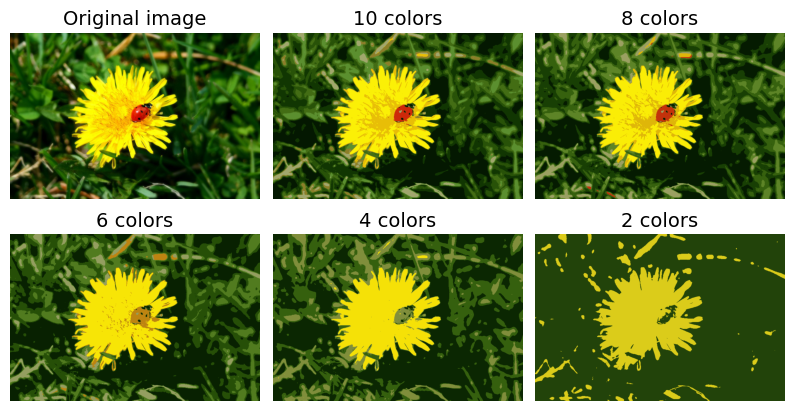

In [50]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

## Using Clustering for Semi-Supervised Learning

In [51]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [52]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [53]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [54]:
# extra code – measure the accuracy when we use the whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [55]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

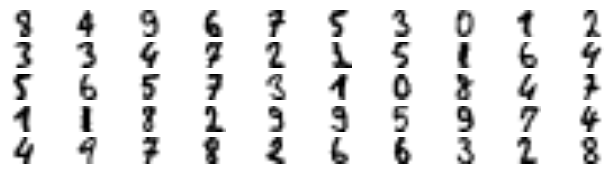

In [56]:
# extra code – this cell generates and saves Figure 9–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_plot", tight_layout=False)
plt.show()

In [57]:
y_representative_digits = np.array([
     8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
     3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
     5, 6, 5, 7, 3, 1, 0, 8, 4, 7, 
     1, 1, 8, 2, 9, 9, 5, 9, 7, 4, 
     4, 9, 7, 8, 2, 6, 6, 3, 2, 8
])

In [58]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8387909319899244

In [59]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [60]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [61]:
log_reg.score(X_test, y_test)

0.8589420654911839

In [62]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [63]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

In [64]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(0.9548148148148148)

* **Clustering for semi-supervised learning**:

  * Useful when:

    * Many unlabeled instances are available
    * Very few labeled instances exist
  * Goal:

    * Maximize model performance while minimizing labeling effort

* Dataset used:

  * **Digits dataset**
  * Characteristics:

    * 1,797 grayscale images
    * Image size: **8 × 8**
    * Classes: digits **0–9**
  * Similar in spirit to MNIST, but much smaller

* Dataset preparation:

  * Data is already shuffled
  * Split into:

    * Training set: 1,400 instances
    * Test set: 397 instances
  * Test set labels are required for evaluation

* Baseline setup:

  * Assume only **50 labeled training instances**
  * Train a **logistic regression** model on these 50 instances

* Baseline performance:

  * Test accuracy ≈ **74.8%**
  * This is significantly worse than:

    * Training on the full labeled training set
    * Full-data accuracy ≈ **90.7%**

* Motivation:

  * Randomly chosen labeled samples are:

    * Not representative
    * Inefficient use of labeling budget

* Step 1: Clustering the training set

  * Use k-means with:

    * Number of clusters **k = 50**
  * Each cluster ideally captures a coherent group of similar digits

* Step 2: Selecting representative instances:

  * For each cluster:

    * Find the instance **closest to the centroid**
  * These instances are called **representative images**
  * One representative per cluster

* Key idea:

  * Representative instances summarize their clusters
  * Labeling them gives maximum coverage of the dataset

* Manual labeling:

  * Human labels the **50 representative images**
  * Result:

    * 50 labeled instances
    * Each is highly informative

* Training with representative instances:

  * Train logistic regression using only these 50 labeled representatives
  * Test accuracy improves to ≈ **84.9%**

* Insight:

  * Labeling **representative samples** is far better than labeling random samples
  * Same labeling cost, much higher performance

* Step 3: Label propagation:

  * Assign each representative’s label to:

    * All other instances in the same cluster
  * This creates a **fully labeled training set**

    * Labels are inferred, not manually annotated

* Training with propagated labels:

  * Train logistic regression on all training instances
  * Test accuracy improves further to ≈ **89.4%**

* Why this works:

  * Clusters group similar digits together
  * Label noise is relatively low within clusters

* Step 4: Removing likely outliers:

  * Compute distance of each instance to its cluster centroid
  * For each cluster:

    * Identify the **top 1% farthest instances**
    * Treat them as unreliable (possible outliers)
  * Exclude these instances from training

* Rationale:

  * Instances far from centroids:

    * Are more likely to be mislabeled
    * Hurt model performance

* Training with partially propagated labels:

  * Train logistic regression on:

    * Propagated labels
    * With outliers removed
  * Test accuracy reaches ≈ **90.9%**

* Final result:

  * Only **50 manually labeled instances**
  * Average of **5 labeled examples per class**
  * Performance slightly **better than fully supervised training**

* Reasons for strong performance:

  * Clustering captures meaningful structure
  * Representative labeling is efficient
  * Label propagation spreads high-quality labels
  * Outlier removal reduces noise

* Additional observation:

  * Propagated labels are highly accurate
  * Approximate accuracy of propagated labels:

    * **~97.5%**

* Key takeaway:

  * Semi-supervised learning with clustering:

    * Dramatically reduces labeling cost
    * Can match or even outperform fully supervised models
  * Best practice:

    * Label representative samples
    * Propagate labels carefully
    * Filter out uncertain points


> Scikit-Learn also offers two classes that can propagate labels automatically:
LabelSpreading and LabelPropagation in the sklearn.semi_supervised package. Both
classes construct a similarity matrix between all the instances, and iteratively propagate
labels from labeled instances to similar unlabeled instances. There’s also a very different
class called SelfTrainingClassifier in the same package: you give it a base classifier (such
as a RandomForestClassifier) and it trains it on the labeled instances, then uses it to
predict labels for the unlabeled samples. It then updates the training set with the labels it is
most confident about, and repeats this process of training and labeling until it cannot add
labels anymore. These techniques are not magic bullets, but they can occasionally give
your model a little boost.

## ACTIVE LEARNING

* **Active learning**:

  * Technique to iteratively improve a model using **human-in-the-loop labeling**
  * Especially useful when:

    * Labels are expensive
    * Expert annotation is required
  * The algorithm decides **which instances should be labeled next**

* Core idea:

  * Not all unlabeled instances are equally valuable
  * Labeling the *right* instances gives more improvement per label

* Active learning workflow:

  * Train a model using the currently labeled dataset
  * Use the trained model to make predictions on **unlabeled instances**
  * Select specific instances for labeling
  * Add newly labeled data to the training set
  * Retrain the model
  * Repeat until gains no longer justify the labeling cost

* Most common strategy: **uncertainty sampling**

  * The model requests labels for instances it is **least confident about**

* Uncertainty sampling steps:

  * Train the model on labeled data
  * Predict probabilities for unlabeled instances
  * Identify instances with:

    * Lowest predicted class probability
    * Highest uncertainty
  * Send these instances to a human expert for labeling
  * Add them to the labeled dataset
  * Retrain and repeat

* Why uncertainty sampling works:

  * Uncertain instances are often:

    * Near decision boundaries
    * Highly informative for refining the model
  * Labeling them helps:

    * Sharpen class boundaries
    * Improve generalization

* Stopping criterion:

  * Stop active learning when:

    * Performance improvement plateaus
    * Labeling cost outweighs performance gain

* Other active learning strategies:

* **Query-by-committee (disagreement-based sampling)**:

  * Train multiple models on the same labeled data
  * Select instances where models **disagree most**
  * Example:

    * Disagreement between an SVM and a random forest
  * Rationale:

    * Disagreement indicates uncertainty in the hypothesis space

* **Expected model change**:

  * Select instances whose labeling would:

    * Cause the largest change in model parameters
  * Focuses on:

    * Maximizing learning impact per label

* **Expected error reduction**:

  * Select instances expected to:

    * Reduce validation error the most
  * More precise but:

    * Computationally expensive

* Comparison to random sampling:

  * Active learning:

    * Fewer labels needed
    * Faster performance improvement
  * Random labeling:

    * Often wastes labeling effort on redundant examples

* Key takeaway:

  * Active learning optimizes the **labeling budget**
  * Human expertise is used **only where it matters most**
  * Particularly powerful when combined with:

    * Semi-supervised learning
    * Clustering-based label propagation


# DBSCAN

**The density-based spatial clustering of applications with noise (DBSCAN)
algorithm defines clusters as continuous regions of high density. Here is how
it works:**
- For each instance, the algorithm counts how many instances are located
within a small distance ε (epsilon) from it. This region is called the
instance’s ε-neighborhood.
- If an instance has at least min_samples instances in its ε-neighborhood
(including itself), then it is considered a core instance. In other words,
core instances are those that are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same
cluster. This neighborhood may include other core instances; therefore, a
long sequence of neighboring core instances forms a single cluster.
Any instance that is not a core instance and does not have one in its
neighborhood is considered an anomaly.

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [66]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [67]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [68]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]], shape=(808, 2))

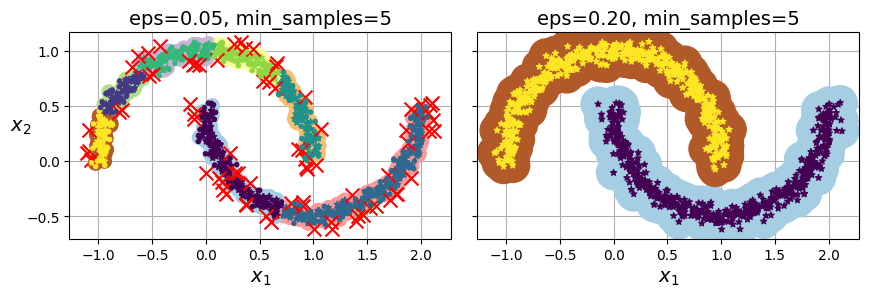

In [69]:
# extra code – this cell generates and saves Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [70]:
dbscan = dbscan2  # extra code – the text says we now use eps=0.2

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [72]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [73]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

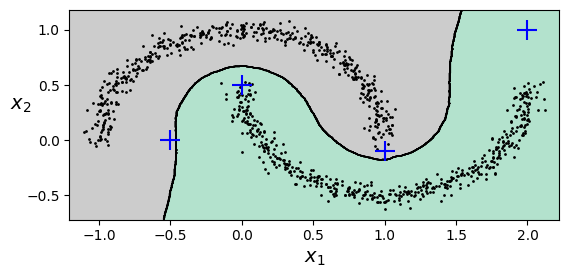

In [74]:
# extra code – this cell generates and saves Figure 9–15

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [75]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

* **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:

  * Works well when clusters are:

    * Separated by **low-density regions**
  * Does **not** assume spherical clusters
  * Can find clusters of **arbitrary shape**

* Applying DBSCAN:

  * Requires only two hyperparameters:

    * `eps` → neighborhood radius
    * `min_samples` → minimum number of points to form a dense region
  * Simple API:

    * `fit()` or `fit_predict()`

* Example dataset:

  * Moons dataset:

    * Nonlinear, non-spherical clusters
    * Commonly used to test density-based methods

* DBSCAN outputs:

  * `labels_`:

    * Cluster index for each instance
    * Value `-1` indicates:

      * **Anomalies / noise points**
  * Clusters are labeled with integers:

    * 0, 1, 2, …

* Core concepts in DBSCAN:

  * **Core instances**:

    * Points with at least `min_samples` neighbors within distance `eps`
  * **Border points**:

    * Points close to a core instance
    * But not dense enough themselves
  * **Noise (anomalies)**:

    * Points that are neither core nor border

* Accessing core information:

  * `core_sample_indices_`:

    * Indices of all core instances
  * `components_`:

    * Feature vectors of core instances

* Sensitivity to `eps`:

  * Small `eps`:

    * Many points labeled as anomalies
    * Too many small clusters
  * Larger `eps`:

    * Neighborhoods expand
    * Clusters merge correctly
  * Proper choice of `eps` is **critical**

* Visual outcome:

  * Poor `eps` choice:

    * Too many clusters
    * Excessive noise detection
  * Good `eps` choice:

    * Clean, meaningful clusters

* DBSCAN limitations in Scikit-Learn:

  * No `predict()` method
  * Cannot directly assign clusters to new unseen instances
  * Only provides `fit()` and `fit_predict()`

* Reason for no `predict()`:

  * Different downstream tasks may require different classifiers
  * Design choice left to the user

* Common workaround:

  * Train a **classifier on DBSCAN output**
  * Example approach:

    * Use only **core instances**
    * Train a k-nearest neighbors (k-NN) classifier

* Training a classifier after DBSCAN:

  * Features:

    * Core instance vectors
  * Labels:

    * DBSCAN cluster labels for core instances
  * This enables:

    * Cluster prediction for new points
    * Probability estimation per cluster

* Predicting new instances:

  * k-NN predicts nearest cluster
  * `predict_proba()` gives:

    * Probability distribution over clusters

* Important caveat:

  * Since anomalies are not included in training:

    * Classifier always assigns a cluster
    * Even for distant points

* Handling anomalies during prediction:

  * Compute distance to nearest neighbor using `kneighbors()`
  * Apply a distance threshold:

    * If distance > threshold → label as `-1` (anomaly)

* Decision boundary behavior:

  * Boundaries follow data density
  * More flexible than k-means
  * Can separate complex shapes

* Strengths of DBSCAN:

  * Finds **any number of clusters**
  * Handles **arbitrary cluster shapes**
  * Robust to **outliers**
  * No need to specify number of clusters in advance
  * Only two hyperparameters

* Weaknesses of DBSCAN:

  * Struggles when:

    * Cluster densities vary significantly
    * No clear low-density separation exists
  * Computational complexity:

    * Roughly ( O(mn) )
    * Does **not scale well** to very large datasets

* Key takeaway:

  * DBSCAN is ideal for:

    * Density-separated clusters
    * Non-spherical structures
    * Anomaly detection
  * For large or variable-density datasets:

    * Other algorithms may be more suitable


>You may also want to try **hierarchical DBSCAN (HDBSCAN)**, which is implemented in
the [scikit-learn-contrib project](https://github.com/scikit-learn-contrib/hdbscan), as it is usually better than DBSCAN at finding clusters of
varying densities.

# Other Clustering Algorithms

## Agglomerative clustering

* **Agglomerative clustering**:

  * A **hierarchical clustering** method
  * Builds clusters **bottom-up**
  * Starts with:

    * Each instance as its own cluster

* Intuitive analogy:

  * Like tiny bubbles floating separately
  * Closest bubbles gradually stick together
  * Eventually forming one large bubble

* Core algorithm idea:

  * At each iteration:

    * Find the **nearest pair of clusters**
    * Merge them into a single cluster
  * Repeat until:

    * Only one cluster remains
    * Or a stopping criterion is met

* Cluster hierarchy:

  * The process forms a **binary tree of clusters**
  * Also called a **dendrogram**
  * Structure:

    * Leaves → individual instances
    * Internal nodes → merged clusters

* Key characteristics:

  * Produces a **full hierarchy**, not just one flat clustering
  * Allows analysis at **multiple levels of granularity**
  * You do not need to commit to a single number of clusters upfront

* Shape flexibility:

  * Can capture clusters of **various shapes**
  * Not restricted to spherical clusters
  * Depends on:

    * Distance metric
    * Linkage criterion

* Distance usage:

  * Can work with **any pairwise distance**
  * Examples:

    * Euclidean
    * Manhattan
    * Cosine
    * Precomputed distances

* Advantages:

  * Produces an **informative cluster tree**
  * More flexible than k-means
  * Useful for:

    * Exploratory data analysis
    * Understanding nested cluster structure

* Scalability considerations:

  * Naively:

    * Does **not scale well** to large datasets
    * Requires computing many pairwise distances

* Connectivity matrix:

  * A **sparse m × m matrix**
  * Indicates which instances are considered neighbors
  * Restricts possible merges to local neighborhoods
  * Greatly improves scalability

* Benefits of using a connectivity matrix:

  * Reduces computational cost
  * Makes agglomerative clustering feasible for large datasets
  * Preserves local structure

* Typical source of connectivity matrix:

  * k-nearest neighbors graph
  * Encodes local adjacency relationships

* Without a connectivity matrix:

  * Algorithm becomes:

    * Computationally expensive
    * Memory intensive
  * Not suitable for large-scale data

* Key takeaway:

  * Agglomerative clustering is powerful for:

    * Hierarchical structure discovery
    * Arbitrary cluster shapes
  * Best used:

    * With a connectivity matrix for large datasets
    * When interpretability and hierarchy matter more than raw speed


In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [78]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [79]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [80]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

## BIRCH

* **BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**:

  * A clustering algorithm designed **specifically for very large datasets**
  * Optimized for:

    * Speed
    * Low memory usage

* Performance characteristics:

  * Often **faster than batch k-means**
  * Produces **similar clustering results** to k-means
  * Works best when:

    * Number of features is **small to moderate**
    * Typically **< 20 features**

* Core idea:

  * Incrementally builds a **hierarchical tree structure**
  * Tree summarizes the dataset instead of storing all instances

* Tree structure:

  * Stores compact statistical summaries of clusters
  * Contains **just enough information** to:

    * Assign new instances to clusters efficiently
  * Avoids keeping every data point in memory

* Training process:

  * Instances are processed **one at a time**
  * Each instance is:

    * Inserted into the tree
    * Merged with existing nodes if possible
  * Tree grows and adapts dynamically

* Memory efficiency:

  * Does **not store all instances explicitly**
  * Uses limited memory even for:

    * Huge datasets
    * Streaming data

* Scalability:

  * Very well suited for:

    * Large-scale clustering
    * Datasets that do not fit in memory
  * More scalable than:

    * Standard k-means
    * Hierarchical clustering without pruning

* Limitations:

  * Less effective when:

    * Feature dimensionality is high
  * Assumes clusters are reasonably compact

* Typical use cases:

  * Large databases
  * Data streams
  * Preliminary clustering before applying more expensive algorithms

* Key takeaway:

  * BIRCH is ideal when:

    * Dataset is massive
    * Memory is limited
    * Speed is critical
  * A strong alternative to k-means for large, low-dimensional data


## Mean-shift

* **Mean-shift clustering**:

  * A **density-based** clustering algorithm
  * Does not require specifying the number of clusters in advance

* Initialization:

  * Place a **circle (window)** centered on **each instance**
  * All circles have the same radius

* Core iterative process:

  * For each circle:

    * Compute the **mean** of all instances inside the circle
    * Shift the circle’s center to this mean
  * Repeat this process:

    * Until the circle stops moving
    * Convergence occurs when the center equals the local mean

* Density-seeking behavior:

  * Circles move toward regions of **higher data density**
  * Each circle climbs the **density gradient**
  * Final positions correspond to **local density maxima (modes)**

* Cluster formation:

  * Instances whose circles:

    * Converge to the same point
    * Or converge to very close points
  * Are assigned to the **same cluster**

* Key properties:

  * Can find:

    * Any number of clusters
    * Clusters of arbitrary shapes
  * Cluster count emerges naturally from the data

* Hyperparameters:

  * Only **one main hyperparameter**:

    * **Bandwidth**

      * Radius of the circles
  * Bandwidth controls:

    * Smoothness of density estimation
    * Number and size of clusters

* Similarities to DBSCAN:

  * Density-based approach
  * No need to predefine number of clusters
  * Can handle complex cluster shapes
  * Relies on local density estimation

* Differences from DBSCAN:

  * Mean-shift is more sensitive to:

    * **Internal density variations**
  * Can **split a single cluster** into multiple parts

    * If density is not uniform

* Computational complexity:

  * Time complexity:

    * ( O(mn) )
  * Computationally expensive
  * Not suitable for:

    * Large datasets
    * High numbers of instances

* Practical limitations:

  * Slow for large-scale data
  * Performance heavily depends on bandwidth choice

* Typical use cases:

  * Small to medium-sized datasets
  * When cluster shapes are complex
  * When number of clusters is unknown

* Key takeaway:

  * Mean-shift is:

    * Conceptually simple
    * Powerful for density-based clustering
  * Trade-offs:

    * High computational cost
    * Sensitivity to bandwidth and density variations


## Spectral clustering

* **Spectral clustering**:

  * A clustering algorithm based on **graph theory**
  * Uses relationships (similarities) between instances instead of raw feature distances

* Core idea:

  * Start with a **similarity matrix**:

    * Each entry measures how similar two instances are
  * Treat data as a **graph**:

    * Instances → nodes
    * Similarities → weighted edges

* Algorithm workflow:

  * Build the similarity (affinity) matrix
  * Compute a **low-dimensional embedding** from this matrix

    * This is a form of **dimensionality reduction**
  * Perform clustering in this low-dimensional space

    * Scikit-Learn uses **k-means** in the embedded space

* Why the embedding helps:

  * Makes complex structures easier to separate
  * Transforms nonlinear cluster structure into a space where:

    * Simple algorithms can work well

* Strengths of spectral clustering:

  * Can capture **complex, non-convex cluster shapes**
  * Effective when clusters are:

    * Intertwined
    * Connected in graph-like structures
  * Naturally suited for **graph clustering**

* Graph-cut interpretation:

  * Can be used to:

    * Partition graphs into groups
  * Example applications:

    * Social networks (finding communities of friends)
    * Network analysis
    * Image segmentation using pixel similarity graphs

* Key requirements:

  * A well-defined similarity measure
  * Quality of clustering depends heavily on:

    * How the similarity matrix is constructed

* Limitations:

  * Does **not scale well** to large datasets

    * Similarity matrix is large and expensive to compute
  * Computational and memory cost grows quickly with number of instances

* Sensitivity to cluster sizes:

  * Performs poorly when clusters have:

    * Very different sizes
  * Can bias results toward balanced partitions

* Practical considerations:

  * Best suited for:

    * Small to medium-sized datasets
    * Problems with complex structure
  * Not ideal for:

    * Very large datasets
    * Highly imbalanced cluster sizes

* Key takeaway:

  * Spectral clustering is powerful for:

    * Nonlinear
    * Graph-based
    * Structure-driven clustering
  * Trade-offs:

    * High computational cost
    * Poor scalability
    * Sensitivity to cluster size imbalance


In [81]:
from sklearn.cluster import SpectralClustering

In [82]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [83]:
sc1.affinity_matrix_.round(2)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [84]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [85]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True,
                             show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}")

In [87]:
# plt.figure(figsize=(9, 3.2))

# plt.subplot(121)
# plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

# plt.subplot(122)
# plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

# plt.show()

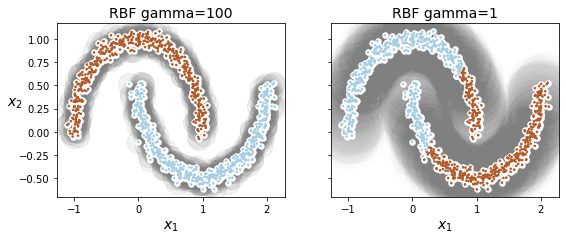

In [90]:
from IPython.display import Image, display

display(Image(filename="images/unsupervised_learning/img1.png"))

# Gaussian Mixtures

* **Gaussian Mixture Model (GMM)**:

  * A **probabilistic clustering model**
  * Assumes data is generated from a **mixture of Gaussian distributions**
  * Parameters of these Gaussians are **unknown**

* Core assumption:

  * Each instance is generated by **one of k Gaussian distributions**
  * Each Gaussian corresponds to **one cluster**

* Cluster characteristics:

  * Clusters typically have **ellipsoidal shapes**
  * Each cluster can differ in:

    * Shape
    * Size
    * Density
    * Orientation
  * Much more flexible than k-means (which assumes spherical clusters)

* Hidden structure:

  * For each instance:

    * You know it comes from *some* Gaussian
    * You do **not** know which Gaussian
  * Cluster assignment is a **latent (hidden) variable**

* Latent variable notation:

  * $( z^{(i)} )$ = index of the Gaussian (cluster) that generated instance ( i )
  * $( z^{(i)} \in {1, 2, \dots, k} )$

* Simplest GMM variant:

  * Implemented in **GaussianMixture**
  * Requires specifying:

    * Number of components (clusters) **k** in advance

* Generative process assumed by a GMM:

* Step 1: choose a cluster

  * For each instance ( i ):

    * Select cluster ( j ) with probability:
      $$[
      P(z^{(i)} = j) = \phi_j
      ]$$
  * ( $\phi_j$ ) is the **weight** of cluster ( j )
  * Constraints:
    $$[
    \sum_{j=1}^{k} \phi_j = 1, \quad \phi_j \ge 0
    ]$$

* Step 2: generate the data point

  * If ( $z^{(i)} = j$ ), then the instance location is sampled from:
    $$[
    x^{(i)} \sim \mathcal{N}(\mu_j, \Sigma_j)
    ]$$
  * Where:

    * ( $\mu_j$ ) = mean vector of Gaussian ( j )
    * ( $\Sigma_j$ ) = covariance matrix of Gaussian ( j )

* Model parameters to learn:

  * Cluster weights:

    * ( $\phi_1, \phi_2, \dots, \phi_k$ )
  * Means:

    * ( $\mu_1, \mu_2, \dots, \mu_k $)
  * Covariance matrices:

    * ( $\Sigma_1, \Sigma_2, \dots, \Sigma_k$ )

* Interpretation of parameters:

  * ( $\phi_j$ ):

    * Relative importance / size of cluster ( j )
  * ( $\mu_j$ ):

    * Center of cluster ( j )
  * ( $\Sigma_j$ ):

    * Shape, orientation, and spread of cluster ( j )

* Why GMMs are powerful:

  * Can model:

    * Overlapping clusters
    * Elliptical clusters
    * Clusters with different densities
  * Assign **soft cluster memberships**

    * Each instance has probabilities of belonging to each cluster

* Typical goal when using a GMM:

  * Given dataset ( X ):

    * Estimate all parameters:

      * ( $\phi_j$ )
      * ( $\mu_j$ )
      * ( $\Sigma_j$ )
  * Also infer:

    * Probability that each instance belongs to each cluster

* Practical note:

  * Scikit-Learn’s **GaussianMixture** class:

    * Handles parameter estimation automatically
    * Uses the **Expectation–Maximization (EM)** algorithm (covered next)

* Key takeaway:

  * GMMs generalize k-means by:

    * Modeling clusters probabilistically
    * Allowing flexible cluster geometry
  * Especially effective when:

    * Clusters are elliptical
    * k-means fails due to shape or density differences


In [91]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [92]:
from sklearn.mixture import GaussianMixture

In [93]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [94]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [95]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [96]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [97]:
gm.converged_

True

In [98]:
gm.n_iter_

4

In [99]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], shape=(1250,))

In [100]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]], shape=(1250, 3))

In [101]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [102]:
y_new

array([0, 0, 1, 1, 1, 2])

In [103]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81], shape=(1250,))

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [104]:
# extra code – bonus material

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

np.float64(0.9999999999225094)

* Observed result interpretation:

  * Two clusters contain **500 instances each**
  * One cluster contains **250 instances**
  * True cluster weights are:
    $$[
    \phi = [0.4,\ 0.4,\ 0.2]
    ]$$
  * Learned weights are **very close to these true values**
  * Learned means and covariance matrices are also close to the true parameters

* Reason this works well:

  * The model is trained using the **Expectation–Maximization (EM) algorithm**

* High-level idea of EM:

  * Iterative optimization algorithm
  * Conceptually similar to k-means
  * Alternates between:

    * Assigning instances to clusters
    * Updating cluster parameters
  * Repeats until convergence

* EM vs k-means (conceptual similarity):

  * Both:

    * Start with **random initialization**
    * Alternate between two steps
    * Converge to a local optimum
  * Key difference:

    * k-means uses **hard assignments**
    * EM uses **soft assignments**

* EM as a generalization of k-means:

  * k-means estimates:

    * Cluster centers ( $\mu_1, \dots, \mu_k $)
  * EM (for GMMs) estimates:

    * Means:
      $$[
      \mu_1, \dots, \mu_k
      ]$$
    * Covariance matrices:
      $$[
      \Sigma_1, \dots, \Sigma_k
      ]$$
    * Cluster weights:
      $$[
      \phi_1, \dots, \phi_k
      ]$$
  * This allows EM to model:

    * Cluster size
    * Shape
    * Orientation
    * Density

* Expectation step (E-step):

  * For each instance ( $x^{(i)}$ ):

    * Compute the probability that it belongs to each cluster ( j )
  * Formally:
    $$[
    \gamma^{(i)}_j = P(z^{(i)} = j \mid x^{(i)})
    ]$$
  * These probabilities depend on:

    * Current ( $\mu_j$ )
    * Current ( $\Sigma_j$ )
    * Current ( $\phi_j$ )
  * Output:

    * A **soft assignment** of each instance to all clusters

* Responsibilities:

  * ( $\gamma^{(i)}_j$ ) is called the **responsibility**
  * Interpretation:

    * How responsible cluster ( j ) is for instance ( i )
  * Properties:
    $$[
    \sum_{j=1}^{k} \gamma^{(i)}_j = 1
    ]$$

* Maximization step (M-step):

  * Update cluster parameters using **all instances**
  * Each instance is **weighted by its responsibility**
  * Updates:

    * Cluster weight:
      $$[
      \phi_j = \frac{1}{m} \sum_{i=1}^{m} \gamma^{(i)}_j
      ]$$
    * Mean:
      $$[
      \mu_j = \frac{\sum_{i=1}^{m} \gamma^{(i)}*j x^{(i)}}{\sum*{i=1}^{m} \gamma^{(i)}_j}
      ]$$
    * Covariance:
      $$[
      \Sigma_j = \frac{\sum_{i=1}^{m} \gamma^{(i)}*j (x^{(i)} - \mu_j)(x^{(i)} - \mu_j)^T}{\sum*{i=1}^{m} \gamma^{(i)}_j}
      ]$$

* Intuition behind M-step:

  * Instances with higher responsibility:

    * Influence the cluster more
  * Instances with low responsibility:

    * Have little impact
  * Each cluster is shaped mostly by the points it best explains

* Convergence behavior:

  * EM monotonically increases the **log-likelihood**
  * Guaranteed to converge
  * But **not guaranteed to find the global optimum**

* Important warning:

  * EM can converge to **poor local optima**
  * Strongly dependent on initialization
  * Same weakness as k-means

* Practical safeguard:

  * Run EM **multiple times**
  * Keep the solution with the **highest log-likelihood**
  * Controlled by:

    * `n_init`

* Scikit-Learn default behavior:

  * `n_init = 1` by default
  * This is risky
  * Best practice:

    * Set `n_init` to a higher value (e.g., 10)

* Key takeaway:

  * EM enables GMMs to:

    * Learn flexible cluster geometry
    * Estimate soft memberships
    * Recover true generative parameters
  * But like k-means:

    * Multiple initializations are essential for reliability


---

* **Checking EM convergence**:

  * The model exposes whether it converged:

    * `converged_` → `True` means EM reached convergence
  * Number of EM iterations used:

    * `n_iter_`
  * Small number of iterations:

    * Indicates fast convergence
    * Typical when initialization is good and clusters are well separated

* What you get after training a GMM:

  * Estimated for each cluster:

    * Mean (location)
    * Covariance (size, shape, orientation)
    * Weight (relative importance)
  * With these parameters, the model can:

    * Assign clusters
    * Estimate probabilities
    * Generate new data
    * Estimate density

* **Hard clustering with GMM**:

  * Use `predict(X)`
  * Each instance is assigned to:

    * The cluster with the **highest posterior probability**
  * Output:

    * One cluster index per instance

* **Soft clustering with GMM**:

  * Use `predict_proba(X)`
  * For each instance:

    * Returns a probability for **each cluster**
  * Properties:

    * Probabilities sum to 1
    * Reflect uncertainty in cluster membership
  * Useful when:

    * Clusters overlap
    * You want confidence-aware decisions

* Interpretation of soft assignments:

  * High probability for one cluster:

    * Instance clearly belongs to that cluster
  * Split probabilities:

    * Instance lies near cluster boundaries

* **GMM as a generative model**:

  * Can generate **new synthetic instances**
  * Sampling process:

    * First sample a cluster according to its weight
    * Then sample a point from that cluster’s Gaussian
  * Output of sampling:

    * New instances
    * Corresponding cluster indices
  * Useful for:

    * Data augmentation
    * Simulation
    * Understanding learned distributions

* **Density estimation with GMM**:

  * Use `score_samples(X)`
  * Returns:

    * Log of the **probability density function (log-PDF)** at each instance

* Interpreting `score_samples`:

  * Higher value:

    * Higher density
    * Instance lies in a dense region of the data
  * Lower value:

    * Lower density
    * Instance is more isolated

* From log-density to density:

  * PDF value:
    $$[
    \text{PDF}(x)=\exp(\text{score_samples}(x))
    ]$$

* Important distinction:

  * PDF values are **not probabilities**
  * They:

    * Are not bounded between 0 and 1
    * Can take any positive value

* Probability vs probability density:

  * Probability:

    * Refers to a region
  * Probability density:

    * Refers to a point
  * To get a probability:

    * Integrate the PDF over a region
  * Over the entire space:
    $$[
    \int\text{PDF}(x),dx = 1
    ]$$

* Practical uses of density estimates:

  * Anomaly detection:

    * Very low density → likely outlier
  * Data analysis:

    * Identify dense vs sparse regions
  * Likelihood-based model comparison

* Key takeaway:

  * GMMs provide:

    * Hard clustering
    * Soft clustering
    * Density estimation
    * Data generation
  * This makes them far more expressive than k-means, at the cost of:

    * Higher complexity
    * Sensitivity to initialization


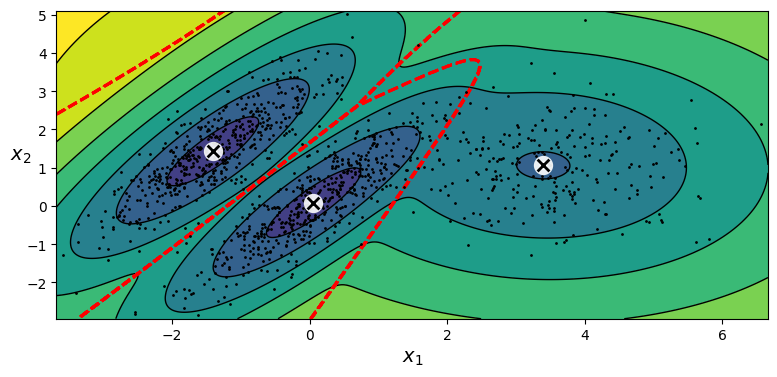

In [105]:
# extra code – this cells generates and saves Figure 9–16

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

* The algorithm performed very well because:

  * The data was **synthetically generated**
  * It followed **2D Gaussian distributions**
  * The correct number of clusters **k** was provided in advance

* This is an **ideal scenario**

  * Real-world data is often:

    * High-dimensional
    * Non-Gaussian
    * Noisy
    * Limited in size

* Practical difficulty with EM (for GMMs):

  * EM can struggle when:

    * Dimensionality is high
    * Number of clusters is large
    * Number of instances is small
  * Reason:

    * Too many parameters must be estimated
    * Increases risk of:

      * Poor convergence
      * Overfitting
      * Bad local optima

* Strategy to help EM converge better:

  * **Reduce model complexity**
  * Limit the number of parameters the algorithm must learn

* One effective way to reduce complexity:

  * **Constrain the covariance matrices**
  * This restricts:

    * Cluster shapes
    * Orientations
    * Degrees of freedom

* Covariance constraints are controlled by:

  * `covariance_type` hyperparameter

* `"full"` (default):

  * Each cluster has its **own full covariance matrix**
  * Clusters can have:

    * Any shape
    * Any size
    * Any orientation
  * Most flexible
  * Most parameters
  * Highest risk of overfitting in difficult settings

* `"spherical"`:

  * Each cluster is **spherical**
  * Covariance matrix:
    $$[
    \Sigma_j = \sigma_j^2 I
    ]$$
  * Properties:

    * Same variance in all directions
    * Different clusters can have different diameters
  * Fewest parameters
  * Strong bias, but very stable

* `"diag"`:

  * Covariance matrices are **diagonal**
  * Clusters are **axis-aligned ellipsoids**
  * No correlation between features
  * Properties:

    * Different variances per feature
    * Axes must align with coordinate axes
  * Balance between flexibility and stability

* `"tied"`:

  * All clusters share the **same covariance matrix**
    $$[
    \Sigma_1 = \Sigma_2 = \dots = \Sigma_k
    ]$$
  * Clusters have:

    * Same shape
    * Same size
    * Same orientation
  * Only means and weights differ
  * Fewer parameters than `"full"`

* Effect of covariance constraints:

  * Fewer parameters → easier optimization
  * More bias → less variance
  * Often improves results when data is:

    * Scarce
    * High-dimensional
    * Noisy

* Visual intuition:

  * `"full"`:

    * Most flexible ellipses
  * `"tied"`:

    * Same ellipse replicated at different locations
  * `"spherical"`:

    * Circles instead of ellipses

* Trade-off to remember:

  * More constraints:

    * Easier convergence
    * Less expressive clusters
  * Fewer constraints:

    * More expressive clusters
    * Higher risk of instability

* Practical takeaway:

  * Start with `"full"` if data is abundant and clean
  * Use `"diag"`, `"tied"`, or `"spherical"` when:

    * EM struggles to converge
    * You suspect overfitting
    * Dataset is small or high-dimensional


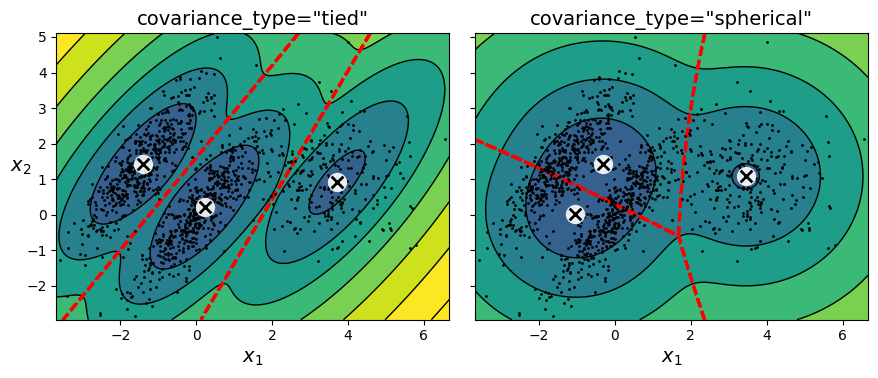

In [106]:
# extra code – this cell generates and saves Figure 9–17

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

>The computational complexity of training a GaussianMixture model depends on the
number of instances m, the number of dimensions n, the number of clusters k, and the
constraints on the covariance matrices. If covariance_type is "spherical" or "diag", it is
O(kmn), assuming the data has a clustering structure. If covariance_type is "tied" or "full",
it is O(kmn + kn ), so it will not scale to large numbers of features.

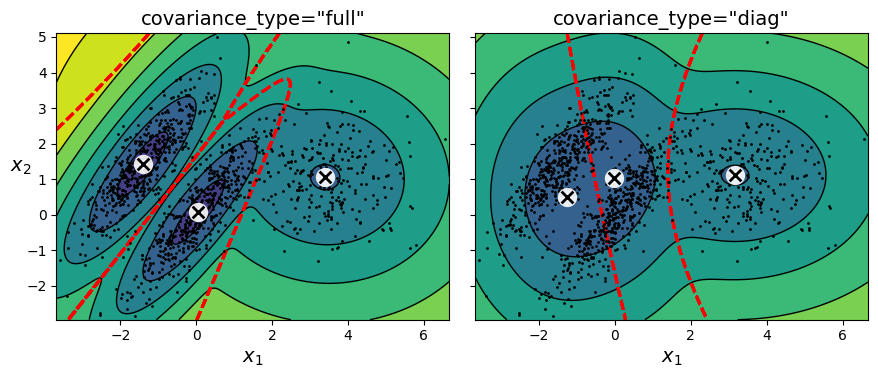

In [107]:
# extra code – comparing covariance_type="full" and covariance_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

# Using Gaussian Mixtures for Anomaly Detection

* **Using Gaussian Mixture Models (GMMs) for anomaly detection**:

  * Based on **density estimation**
  * Core idea:

    * Instances in **low-density regions** are likely anomalies

* Density-based anomaly rule:

  * Compute the probability density for each instance
  * Define a **density threshold**
  * Any instance with density **below the threshold** is flagged as an anomaly

* Choosing the density threshold:

  * Often guided by **domain knowledge**
  * Example (manufacturing):

    * Defective product rate ≈ **2%**
    * Choose threshold so that:

      * ~2% of instances fall below it

* Practical threshold tuning:

  * Too many **false positives** (normal items flagged):

    * Lower the threshold
  * Too many **false negatives** (defects missed):

    * Increase the threshold
  * This is the classic **precision–recall trade-off**

* Precision–recall intuition:

  * Higher threshold:

    * More anomalies detected
    * Higher recall
    * Lower precision
  * Lower threshold:

    * Fewer anomalies detected
    * Higher precision
    * Lower recall

* Computing anomaly scores with GMM:

  * Use `score_samples(X)`
  * Returns:

    * **Log of the probability density (log-PDF)** for each instance
  * Lower score → lower density → more anomalous

* Threshold via percentiles:

  * Choose a percentile of the density distribution
  * Example:

    * 2nd percentile → ~2% of points flagged as anomalies
  * Procedure:

    * Compute all densities
    * Compute percentile threshold
    * Flag points below threshold

* Resulting anomalies:

  * Are points in the **lowest-density regions**
  * Often lie far from cluster centers
  * Useful for:

    * Defect detection
    * Fraud detection
    * Outlier removal

* Visualization:

  * Anomalies are often shown as:

    * Isolated points
    * Far from dense cluster regions

* **Anomaly detection vs novelty detection**:

  * Anomaly detection:

    * Training data **may contain outliers**
    * Often used to **clean datasets**
  * Novelty detection:

    * Training data assumed to be **clean**
    * Goal is to detect **new, unseen abnormal patterns**

* Important caveat with GMMs:

  * GMMs try to fit **all data points**
  * If many outliers are present:

    * The model’s notion of “normal” becomes biased
    * Some anomalies may be modeled as normal

* Mitigation strategies:

  * Iterative cleaning:

    * Fit GMM
    * Remove most extreme outliers
    * Refit GMM on cleaned data
  * Robust alternatives:

    * Use robust covariance estimation methods
    * Example: EllipticEnvelope

* Limitation reminder:

  * GMMs require specifying the **number of clusters**
  * Choosing this value correctly is critical
  * Leads naturally to the next question:

    * How to select the optimal number of Gaussian components


In [108]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

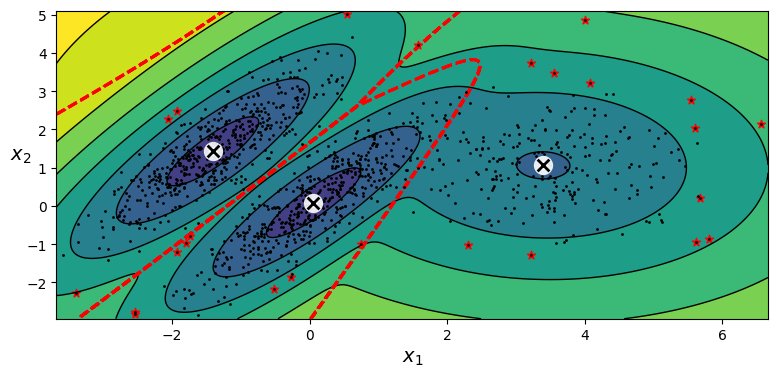

In [109]:
# extra code – this cell generates and saves Figure 9–18

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

# Selecting the Number of Clusters

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [110]:
gm.bic(X)

8189.733705221638

In [111]:
gm.aic(X)

8102.5084251066

In [112]:
# extra code – bonus material
# We could compute the BIC manually like this
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.733705221638
aic = 8102.5084251066
n_params = 17


There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

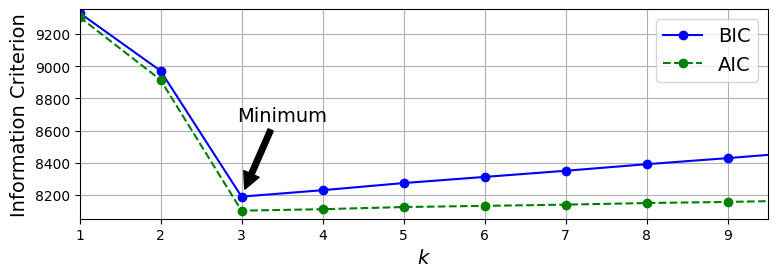

In [113]:
# extra code – this cell generates and saves Figure 9–20
# Let's train Gaussian Mixture models with various values of  k  and measure their BIC:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
save_fig("aic_bic_vs_k_plot")
plt.show()

## LIKELIHOOD FUNCTION

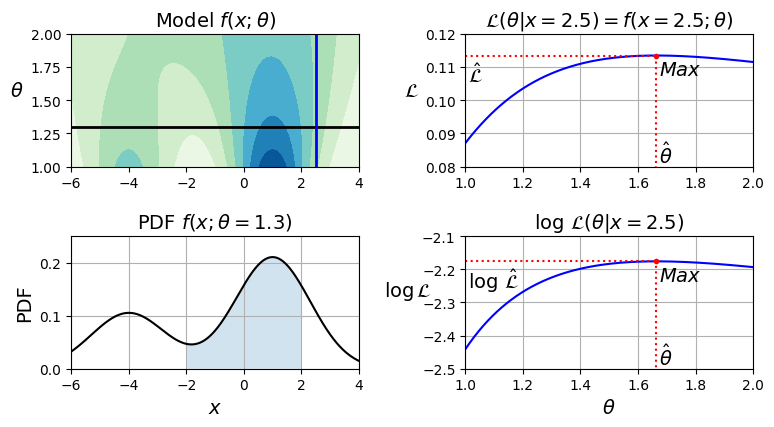

In [114]:
# extra code – this cell generates and saves Figure 9–19

from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # index of the first value >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

plt.figure(figsize=(8, 4.5))

plt.subplot(2, 2, 1)
plt.contourf(Xs, Stds, Z, cmap="GnBu")
plt.plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
plt.plot([x_val, x_val], [1, 2], "b-", linewidth=2)
plt.ylabel(r"$\theta$", rotation=0, labelpad=10)
plt.title(r"Model $f(x; \theta)$")

plt.subplot(2, 2, 2)
plt.plot(stds, Z[:, x_example_idx], "b-")
plt.plot(stds[max_idx], max_val, "r.")
plt.plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
plt.plot([0, stds[max_idx]], [max_val, max_val], "r:")
plt.text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
plt.text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
plt.text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
plt.ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
plt.grid()
plt.axis([1, 2, 0.08, 0.12])

plt.subplot(2, 2, 3)
plt.plot(xs, Z[s_example_idx], "k-")
plt.fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel("PDF")
plt.title(fr"PDF $f(x; \theta={std_val})$")
plt.grid()
plt.axis([-6, 4, 0, 0.25])

plt.subplot(2, 2, 4)
plt.plot(stds, np.log(Z[:, x_example_idx]), "b-")
plt.plot(stds[log_max_idx], log_max_val, "r.")
plt.plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
plt.plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
plt.text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
plt.text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
plt.text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
plt.grid()
plt.axis([1, 2, -2.5, -2.1])

save_fig("likelihood_function_plot")
plt.show()

* **Probability vs likelihood**:

  * Often confused in everyday language
  * Have **distinct meanings** in statistics

* Setup:

  * Assume a statistical model with parameters ( $\theta$ )
  * Model describes data using:
    $$[
    f(x;\theta)
    ]$$

* **Probability**:

  * Question answered:

    * *How plausible is a future outcome ( x ), given known parameters ( \theta )?*
  * Parameters are **fixed**
  * Data is **random**
  * Example:

    * Given ( $\theta = 1.3$ ), what values of ( x ) are likely?

* Probability density function (PDF):

  * Fix ( $\theta$ )
  * View the model as a function of ( x ):
    $$[
    f(x;\theta=1.3)
    ]$$
  * This curve integrates to 1 over all possible ( x )

* Computing probabilities:

  * To find the probability that ( x ) lies in an interval ([a, b]):
    $$[
    P(a \le x \le b \mid \theta) = \int_a^b f(x;\theta),dx
    ]$$
  * This is an **area under the PDF**

* **Likelihood**:

  * Question answered:

    * *How plausible are parameter values ( $\theta$ ), given observed data ( x )?*
  * Data is **fixed**
  * Parameters are treated as **variables**
  * Likelihood function:
    $$[
    \mathcal{L}(\theta \mid x) = f(x;\theta)
    ]$$

* Key distinction:

  * Probability:

    * Varies with ( x )
    * Parameters fixed
  * Likelihood:

    * Varies with ( $\theta$ )
    * Observed data fixed

* Important note:

  * Likelihood is **not a probability distribution over ( $\theta$ )**
  * It does **not** integrate to 1 over ( $\theta$ )

* Toy example context:

  * 1D mixture of two Gaussian distributions
  * Centers at:

    * (-4)
    * (+1)
  * Single parameter:

    * ( $\theta$ ) controls the **standard deviation** of both Gaussians

* Joint model view:

  * The function ( $f(x;\theta)$ ) can be visualized over:

    * Data axis ( x )
    * Parameter axis ( $\theta$ )

* Probability perspective:

  * Fix ( $\theta$ = 1.3 )
  * Slice the model horizontally
  * This gives:
    $$[
    f(x;\theta=1.3)
    ]$$
  * Used to:

    * Predict future outcomes
    * Compute probabilities over ranges of ( x )

* Likelihood perspective:

  * Observe a data point:
    $$[
    x = 2.5
    ]$$
  * Slice the model vertically
  * This gives the likelihood function:
    $$[
    \mathcal{L}(\theta \mid x=2.5) = f(x=2.5;\theta)
    ]$$
  * Used to:

    * Estimate which values of ( $\theta$ ) best explain the data

* Interpretation of likelihood curve:

  * Peaks at parameter values where:

    * The observed data is most plausible
  * Maximum likelihood estimate (MLE):
    $$[
    \hat{\theta} = \arg\max_\theta \mathcal{L}(\theta \mid x)
    ]$$

* Core takeaway:

  * **Probability**:

    * Forward reasoning (parameters → data)
  * **Likelihood**:

    * Reverse reasoning (data → parameters)
  * Same mathematical function:
    $$[
    f(x;\theta)
    ]$$
  * Different interpretation depending on:

    * What is fixed
    * What is treated as variable


---

* **Key distinction recap**:

  * **PDF**:

    * Function of ( x )
    * Parameters ( $\theta$ ) are fixed
    * Integrates to 1 over all possible ( x )
  * **Likelihood function**:

    * Function of ( $\theta$ )
    * Observed data ( x ) is fixed
    * Does **not** integrate to 1 over ( $\theta$ )
    * Can integrate to any positive value

* Probability vs likelihood (formal view):

  * Probability:
    $$[
    f(x \mid \theta)
    ]$$
  * Likelihood:
    $$[
    \mathcal{L}(\theta \mid x) = f(x;\theta)
    ]$$
  * Same mathematical expression, different interpretation

* Parameter estimation task:

  * Given a dataset ( X )
  * Goal:

    * Find parameter values that **maximize the likelihood**
  * This approach is called **Maximum Likelihood Estimation (MLE)**

* Maximum Likelihood Estimation (MLE):

  * Definition:
    $$[
    \hat{\theta} = \arg\max_{\theta} \mathcal{L}(\theta \mid X)
    ]$$
  * Intuition:

    * Choose parameters that make the observed data most plausible

* Example (single observation):

  * Observed instance:
    $$[
    x = 2.5
    ]$$
  * Likelihood maximized at:
    $$[
    \hat{\theta} = 1.5
    ]$$

* Maximum a-posteriori (MAP) estimation:

  * Used when a **prior distribution** over parameters exists
  * Prior:
    $$[
    g(\theta)
    ]$$
  * MAP objective:
    $$[
    \hat{\theta}*{MAP} = \arg\max*{\theta} \mathcal{L}(\theta \mid X), g(\theta)
    ]$$
  * Interpretation:

    * Balances data likelihood with prior beliefs

* Relationship between MLE and MAP:

  * MLE:

    * Uses data only
  * MAP:

    * Uses data + prior
  * MAP can be seen as:

    * A **regularized version of MLE**
    * Prior discourages extreme parameter values

* Log-likelihood:

  * Maximizing likelihood is equivalent to maximizing **log-likelihood**
  * Reason:

    * Logarithm is strictly increasing
  * If:
    $$[
    \hat{\theta} = \arg\max_{\theta} \log \mathcal{L}(\theta \mid X)
    ]$$
    then:
    $$[
    \hat{\theta} = \arg\max_{\theta} \mathcal{L}(\theta \mid X)
    ]$$

* Why log-likelihood is preferred:

  * Numerical stability
  * Simpler optimization
  * Turns products into sums

* Multiple independent observations:

  * Likelihood:
    $$[
    \mathcal{L}(\theta \mid X) = \prod_{i=1}^{m} \mathcal{L}(\theta \mid x^{(i)})
    ]$$
  * Log-likelihood:
    $$[
    \log \mathcal{L}(\theta \mid X) = \sum_{i=1}^{m} \log \mathcal{L}(\theta \mid x^{(i)})
    ]$$
  * Uses identity:
    $$[
    \log(ab) = \log(a) + \log(b)
    ]$$

* After estimating parameters:

  * Obtain:
    $$[
    \hat{\theta}
    ]$$
  * Compute:
    $$[
    \hat{L} = \mathcal{L}(\hat{\theta}, X)
    ]$$
  * This value measures:

    * How well the model fits the data

* Role of ( $\hat{L}$ ):

  * Used to compute:

    * **AIC (Akaike Information Criterion)**
    * **BIC (Bayesian Information Criterion)**
  * These criteria:

    * Balance goodness of fit
    * Penalize model complexity

* Key takeaways:

  * PDF → varies with data
  * Likelihood → varies with parameters
  * Likelihood is **not** a probability distribution
  * MLE maximizes data fit
  * MAP adds prior-based regularization
  * Log-likelihood simplifies optimization
  * ( \hat{L} ) is central to model comparison (AIC, BIC)


# Bayesian Gaussian Mixture Models

* Manually choosing the optimal number of clusters can be difficult and error-prone

* An alternative is to use **Bayesian Gaussian Mixture Models**

* **BayesianGaussianMixture**:

  * Extends Gaussian Mixture Models with a **Bayesian prior**
  * Automatically reduces the number of effective clusters
  * Unnecessary clusters get:

    * Very small weights
    * Often exactly or nearly zero

* Core idea:

  * Start with a **large number of components**
  * Let the model decide how many are actually needed
  * Extra components are effectively ignored

* Practical usage strategy:

  * Set `n_components` to a value:

    * Larger than the expected true number of clusters
    * Based on rough domain knowledge
  * The model will:

    * Keep useful clusters
    * Suppress redundant ones

* Observed behavior:

  * Out of 10 possible clusters:

    * Only 3 receive significant weights
    * Remaining clusters have weights ≈ 0
  * Indicates:

    * Only 3 clusters are supported by the data

* Interpretation of weights:

  * Cluster weight ≈ 0:

    * Cluster is unnecessary
    * No data effectively assigned to it
  * Nonzero weights:

    * Correspond to meaningful clusters

* Resulting clustering quality:

  * Automatically detected number of clusters
  * Learned clusters are:

    * Very close to those found with a correctly tuned standard GMM

* Key benefit:

  * Avoids explicit model selection for k
  * Reduces reliance on:

    * Elbow method
    * Silhouette analysis
    * Manual trial-and-error

* Important limitation of (Bayesian) GMMs:

  * Assumes clusters are **Gaussian / ellipsoidal**
  * Performs poorly when cluster shapes:

    * Are non-elliptical
    * Are highly curved or intertwined

* Example failure case:

  * Applying Bayesian GMM to the **two-moons dataset**
  * True structure:

    * Two curved, non-Gaussian clusters
  * Model behavior:

    * Tries to approximate shapes using ellipsoids
    * Ends up creating many small clusters (e.g., 8 instead of 2)

* Interpretation of this failure:

  * The model:

    * Fits density reasonably well
    * But fails at **semantic clustering**
  * Ellipsoids cannot represent curved manifolds efficiently

* Possible partial use:

  * Even when clustering fails:

    * Density estimation may still be useful
  * Can still work for:

    * Anomaly detection
    * Outlier scoring

* General lesson:

  * No clustering algorithm is universal
  * Gaussian-based models excel at:

    * Elliptical clusters
  * They struggle with:

    * Arbitrarily shaped clusters

* Transition insight:

  * For complex, non-elliptical cluster shapes:

    * Other algorithms are needed
  * Leads naturally to methods designed for:

    * Arbitrarily shaped clusters


In [115]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\mixture\_base.py:293: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

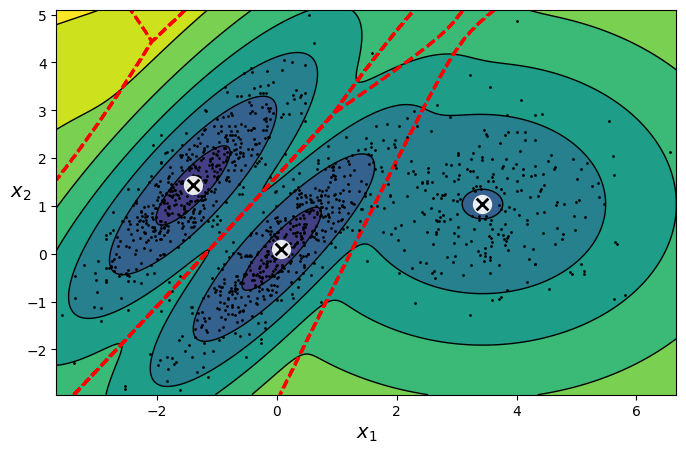

In [116]:
# extra code – this figure is almost identical to Figure 9–16
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\mixture\_base.py:293: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


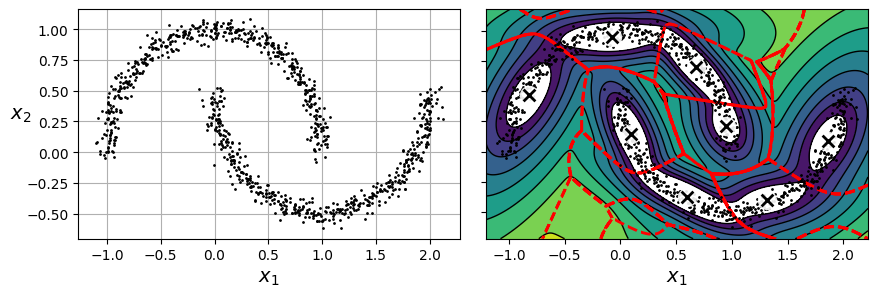

In [117]:
# extra code – this cell generates and saves Figure 9–21

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

# Other Algorithms for Anomaly and Novelty Detection

## Fast-MCD (minimum covariance determinant)

* **Fast-MCD (Minimum Covariance Determinant)**:

  * A **robust outlier detection** algorithm
  * Implemented in scikit-learn as **EllipticEnvelope**
  * Commonly used to **clean datasets** before further modeling

* Core assumption:

  * Normal data points (**inliers**) are generated from:

    * A **single Gaussian distribution**
  * Outliers:

    * Do **not** follow this Gaussian distribution
    * Contaminate the dataset

* Main idea:

  * Estimate the Gaussian parameters:

    * Mean
    * Covariance matrix
  * While being **robust to outliers**
  * Does not let extreme points distort the estimation

* Minimum Covariance Determinant principle:

  * Find a subset of the data:

    * With minimum covariance determinant
  * This subset:

    * Represents the most compact, consistent group of points
    * Is likely composed mostly of inliers

* How Fast-MCD works conceptually:

  * Identify the subset of instances that:

    * Best fit a Gaussian shape
    * Minimize the determinant of the covariance matrix
  * Use this subset to:

    * Estimate the Gaussian parameters
  * Outliers are largely ignored during estimation

* Resulting model:

  * Produces an **elliptic envelope**

    * Ellipsoid enclosing the inliers
  * The envelope:

    * Represents the region of “normal” data

* Outlier detection rule:

  * Instances that lie:

    * Outside the elliptic envelope
  * Are classified as **outliers**

* Why this is better than naive Gaussian fitting:

  * Standard covariance estimation:

    * Is highly sensitive to outliers
  * Fast-MCD:

    * Prevents outliers from:

      * Skewing the mean
      * Inflating the covariance
  * Leads to:

    * More accurate boundary for normal data

* Strengths:

  * Robust to significant contamination
  * Effective when:

    * Inliers follow a roughly Gaussian distribution
  * Very good for:

    * Dataset cleanup
    * Preprocessing before clustering or classification

* Limitations:

  * Assumes **one Gaussian cluster**
  * Not suitable when:

    * Normal data consists of multiple clusters
    * Data distribution is highly non-Gaussian

* Typical use cases:

  * Detecting gross outliers
  * Cleaning measurement errors
  * Preprocessing for density-based or clustering algorithms

* Key takeaway:

  * Fast-MCD focuses on **robust covariance estimation**
  * It isolates the true data structure by:

    * Ignoring likely outliers
  * Best used when:

    * Normal data ≈ single Gaussian
    * Outliers are present and harmful


## Isolation forest

* **Isolation Forest**:

  * An **outlier (anomaly) detection** algorithm
  * Designed to be:

    * Efficient
    * Scalable
    * Effective in **high-dimensional** datasets

* Core idea:

  * Anomalies are:

    * Few
    * Different
  * Therefore:

    * Easier to **isolate** than normal instances

* Algorithm structure:

  * Based on an **ensemble of decision trees**
  * Trees are grown:

    * Randomly
    * Independently
  * Forms a random forest, but used for isolation, not prediction

* Tree construction process:

  * At each node:

    * Randomly select a feature
    * Randomly select a split threshold

      * Between the feature’s minimum and maximum values
  * Split the data into two subsets
  * Repeat recursively

* Isolation process:

  * Splitting continues until:

    * Each instance is isolated
    * Or a maximum tree depth is reached

* Path length intuition:

  * Path length = number of splits required to isolate a point
  * **Anomalies**:

    * Lie far from dense regions
    * Get isolated **in fewer splits**
  * **Normal instances**:

    * Lie in dense regions
    * Require more splits to isolate

* Ensemble behavior:

  * Multiple random trees are built
  * For each instance:

    * Average isolation path length is computed
  * This averaging:

    * Reduces variance
    * Improves robustness

* Anomaly scoring:

  * Short average path length → high anomaly score
  * Long average path length → normal instance

* Strengths of Isolation Forest:

  * Works well in:

    * High-dimensional spaces
  * Does not require:

    * Distance computations
    * Density estimation
  * Scales efficiently to:

    * Large datasets

* Advantages over density-based methods:

  * Less affected by:

    * Curse of dimensionality
  * No assumption about:

    * Data distribution
    * Cluster shape

* Hyperparameters:

  * Number of trees
  * Subsample size
  * Maximum tree depth
  * Generally easy to tune

* Typical use cases:

  * Fraud detection
  * Intrusion detection
  * Manufacturing defect detection
  * High-dimensional anomaly detection

* Key takeaway:

  * Isolation Forest detects anomalies by:

    * **Isolating points**, not modeling normality
  * Anomalies stand out because:

    * They are easier to separate
  * One of the most practical and scalable anomaly detection algorithms


## Local outlier factor (LOF)

* **Local Outlier Factor (LOF)**:

  * A **density-based outlier detection** algorithm
  * Focuses on **local neighborhood density**, not global structure

* Core intuition:

  * Normal instances:

    * Have a density similar to their neighbors
  * Anomalies:

    * Are more **isolated**
    * Have significantly lower local density than nearby points

* How LOF works conceptually:

  * For each instance:

    * Find its **k-nearest neighbors**
  * Estimate:

    * Local density around the instance
    * Local density around each neighbor
  * Compare these densities

* Local density comparison:

  * If an instance’s density is:

    * Much lower than its neighbors’ densities
  * Then:

    * It is likely an outlier

* LOF score:

  * Measures how isolated a point is relative to its neighborhood
  * Interpretation:

    * LOF ≈ 1 → normal
    * LOF > 1 → potential outlier
    * Larger LOF → more anomalous

* Key hyperparameter:

  * `k` (number of neighbors)
  * Controls:

    * Locality scale
    * Sensitivity to noise

* Strengths of LOF:

  * Detects **local anomalies**

    * Points that are anomalous in their local region
  * Works well when:

    * Data has varying density
    * Global methods fail

* Differences from global density methods:

  * Global methods:

    * May miss anomalies in dense regions
  * LOF:

    * Adapts to local density variations

* Limitations:

  * Sensitive to choice of `k`
  * Computationally expensive for large datasets
  * Struggles in very high-dimensional spaces

* Practical usage notes:

  * Best for:

    * Medium-sized datasets
    * Situations where local context matters
  * Often used as:

    * A data-cleaning step
    * An exploratory anomaly detector

* Key takeaway:

  * LOF detects anomalies by asking:

    * “Is this point much less dense than its neighbors?”
  * Excellent for uncovering **subtle, local outliers**


## One-class SVM

* **One-Class SVM**:

  * An algorithm primarily used for **novelty detection**
  * Assumes training data contains **only normal instances**
  * Goal:

    * Learn the boundary of normal data
    * Detect instances that fall outside this boundary as anomalies

* Conceptual link to SVMs:

  * Standard (kernelized) SVM:

    * Maps data to a **high-dimensional feature space**
    * Separates **two classes** with a linear hyperplane
  * One-Class SVM:

    * Also maps data to a high-dimensional space
    * But instead of separating two classes:

      * Separates the data from the **origin**

* Core idea:

  * Find a decision boundary in high-dimensional space that:

    * Encloses most of the training data
    * Maximizes separation from the origin
  * In the original input space:

    * This corresponds to a **compact region** containing normal instances

* Decision rule:

  * If a new instance:

    * Falls **inside** the learned region → normal
    * Falls **outside** the region → anomaly / novel instance

* Kernel trick:

  * Uses kernels (e.g., RBF) to:

    * Capture complex, nonlinear boundaries
  * Allows modeling of:

    * Arbitrary shapes of normal data regions

* Hyperparameters:

  * Standard kernel SVM hyperparameters:

    * Kernel type
    * Kernel-specific parameters (e.g., γ for RBF)
  * Additional key hyperparameter:

    * **ν (nu)**:

      * Controls the fraction of training instances allowed outside the boundary
      * Interpretable as:

        * Upper bound on training error
        * Approximate probability that a new instance is wrongly flagged as novel

* Effect of ν:

  * Larger ν:

    * Tighter boundary
    * More points considered anomalies
    * Higher recall, lower precision
  * Smaller ν:

    * Looser boundary
    * Fewer anomalies detected
    * Higher precision, lower recall

* Strengths:

  * Works very well in:

    * **High-dimensional spaces**
  * Can model:

    * Complex nonlinear normal regions
  * Well suited for:

    * Novelty detection scenarios
    * Clean training datasets

* Limitations:

  * Like all SVMs:

    * Does **not scale well** to very large datasets
    * Training cost grows quickly with number of instances
  * Sensitive to:

    * Kernel choice
    * Hyperparameter tuning

* Comparison to anomaly detection:

  * Novelty detection:

    * Training data assumed **clean**
    * Goal is to detect **new abnormal patterns**
  * Anomaly detection:

    * Training data may already contain outliers

* Typical use cases:

  * Intrusion detection
  * Fault detection with clean historical data
  * Monitoring systems where new behaviors must be flagged

* Key takeaway:

  * One-Class SVM learns a **boundary of normality**
  * New points outside this boundary are treated as anomalies
  * Powerful for high-dimensional novelty detection
  * Not suitable for very large-scale datasets


## PCA and other dimensionality reduction techniques with an inverse_transform() method

* **Anomaly detection using dimensionality reduction**:

  * Applicable to **PCA** and other methods that support `inverse_transform()`
  * Relies on **reconstruction error**

* Core intuition:

  * Dimensionality reduction learns:

    * The main structure of **normal data**
  * Normal instances:

    * Are well represented in the reduced subspace
    * Reconstruct accurately
  * Anomalies:

    * Do not follow the learned structure
    * Reconstruct poorly

* Reconstruction process:

  * Project instance to low-dimensional space
  * Reconstruct it back to the original space using:

    * `inverse_transform()`

* Reconstruction error:

  * Measures how much information is lost during reconstruction
  * Common definition:
    $$[
    \text{Reconstruction error}(x) = \lVert x - \hat{x} \rVert
    ]$$
  * Where:

    * ( x ) = original instance
    * ( $\hat{x}$ ) = reconstructed instance

* Normal vs anomalous behavior:

  * Normal instance:

    * Small reconstruction error
  * Anomaly:

    * Large reconstruction error

* Decision rule:

  * Set an error threshold
  * If:
    $$[
    \lVert x - \hat{x} \rVert > \text{threshold}
    ]$$
    → classify as anomaly

* Threshold selection:

  * Based on:

    * Percentiles of reconstruction error
    * Domain knowledge
    * Precision–recall trade-offs

* Advantages:

  * Simple and intuitive
  * Often very effective
  * No need to:

    * Explicitly model anomalies
  * Scales well with PCA

* Applicability:

  * Works well when:

    * Normal data lies near a **low-dimensional manifold**
  * Especially useful in:

    * High-dimensional data
    * Signal processing
    * Sensor data
    * Image data

* Supported methods:

  * PCA
  * Incremental PCA
  * Kernel PCA (when inverse transform is available)
  * Autoencoders (deep learning equivalent)

* Limitations:

  * Requires:

    * An inverse mapping to original space
  * Poor performance if:

    * Normal data is not well captured by low-dimensional structure
  * Sensitive to:

    * Number of components retained

* Relation to other methods:

  * Similar in spirit to:

    * Autoencoder-based anomaly detection
  * Uses linear (or kernelized) projections instead of neural networks

* Key takeaway:

  * Reconstruction error is a powerful anomaly signal
  * Dimensionality reduction provides a simple, effective anomaly detector
  * Best when normal data has strong low-dimensional structure


# Exercises

## 1. How would you define clustering? Can you name a few clustering algorithms?

In Machine Learning, clustering is the unsupervised task of grouping similar instances together. The notion of similarity depends on the task at hand: for example, in some cases two nearby instances will be considered similar, while in others similar instances may be far apart as long as they belong to the same densely packed group. Popular clustering algorithms include K-Means, DBSCAN, agglomerative clustering, BIRCH, Mean-Shift, affinity propagation, and spectral :.

## 2. What are some of the main applications of clustering algorithms?

The main applications of clustering algorithms include data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, anomaly detection, and novelty detection.

## 3. Describe two techniques to select the right number of clusters when using k-means

The elbow rule is a simple technique to select the number of clusters when using K-Means: just plot the inertia (the mean squared distance from each instance to its nearest centroid) as a function of the number of clusters, and find the point in the curve where the inertia stops dropping fast (the "elbow"). This is generally close to the optimal number of clusters. Another approach is to plot the silhouette score as a function of the number of clusters. There will often be a peak, and the optimal number of clusters is generally nearby. The silhouette score is the mean silhouette coefficient over all instances. This coefficient varies from +1 for instances that are well inside their cluster and far from other clusters, to –1 for instances that are very close to another cluster. You may also plot the silhouette diagrams and perform a more thorough analysis.

## 4. What is label propagation? Why would you implement it, and how?

Labeling a dataset is costly and time-consuming. Therefore, it is common to have plenty of unlabeled instances, but few labeled instances. Label propagation is a technique that consists in copying some (or all) of the labels from the labeled instances to similar unlabeled instances. This can greatly extend the number of labeled instances, and thereby allow a supervised algorithm to reach better performance (this is a form of semi-supervised learning). One approach is to use a clustering algorithm such as K-Means on all the instances, then for each cluster find the most common label or the label of the most representative instance (i.e., the one closest to the centroid) and propagate it to the unlabeled instances in the same cluster.

## 5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

K-Means and BIRCH scale well to large datasets. DBSCAN and Mean-Shift look for regions of high density.

## 6. Can you think of a use case where active learning would be useful? How would you implement it?

Active learning is useful whenever you have plenty of unlabeled instances but labeling is costly. In this case (which is very common), rather than randomly selecting instances to label, it is often preferable to perform active learning, where human experts interact with the learning algorithm, providing labels for specific instances when the algorithm requests them. A common approach is uncertainty sampling (see the _Active Learning_ section in chapter 9).

## 7. What is the difference between anomaly detection and novelty detection?

Many people use the terms _anomaly detection_ and _novelty detection_ interchangeably, but they are not exactly the same. In anomaly detection, the algorithm is trained on a dataset that may contain outliers, and the goal is typically to identify these outliers (within the training set), as well as outliers among new instances. In novelty detection, the algorithm is trained on a dataset that is presumed to be "clean," and the objective is to detect novelties strictly among new instances. Some algorithms work best for anomaly detection (e.g., Isolation Forest), while others are better suited for novelty detection (e.g., one-class SVM).

## 8. What is a Gaussian mixture? What tasks can you use it for?

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. In other words, the assumption is that the data is grouped into a finite number of clusters, each with an ellipsoidal shape (but the clusters may have different ellipsoidal shapes, sizes, orientations, and densities), and we don't know which cluster each instance belongs to. This model is useful for density estimation, clustering, and anomaly detection.

## 9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

One way to find the right number of clusters when using a Gaussian mixture model is to plot the Bayesian information criterion (BIC) or the Akaike information criterion (AIC) as a function of the number of clusters, then choose the number of clusters that minimizes the BIC or AIC. Another technique is to use a Bayesian Gaussian mixture model, which automatically selects the number of clusters.

## 10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096.Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into atraining set, a validation set, and a  test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the  clusters: do you see similar faces in each cluster?

In [119]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\roush\scikit_learn_data


In [120]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [121]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [123]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [124]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_
# to speed up the training

np.int64(199)

In [125]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


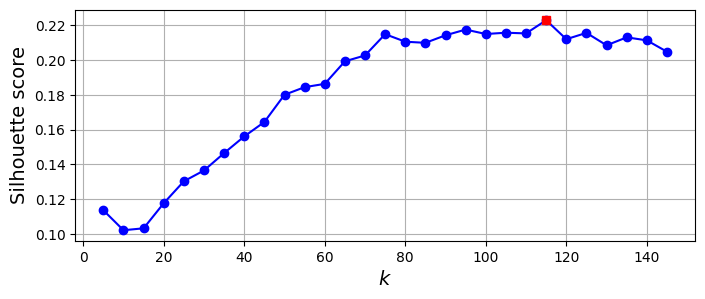

In [126]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [127]:
best_k

115

It looks like the best number of clusters is quite high, at 120. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

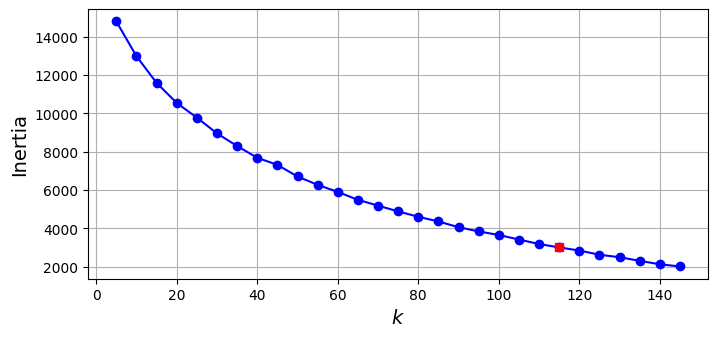

In [128]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=120.

In [129]:
best_model = kmeans_per_k[best_index]

Cluster 0


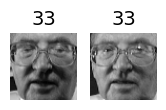

Cluster 1


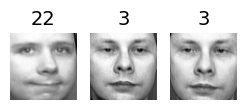

Cluster 2


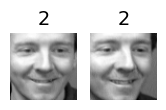

Cluster 3


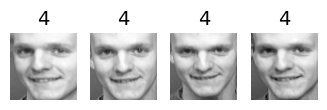

Cluster 4


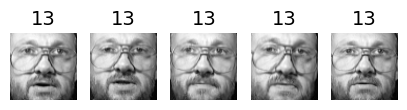

Cluster 5


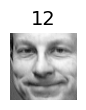

Cluster 6


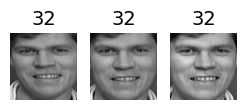

Cluster 7


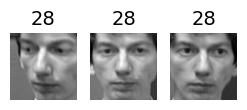

Cluster 8


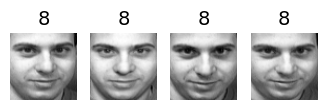

Cluster 9


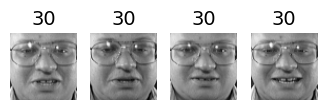

Cluster 10


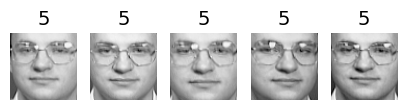

Cluster 11


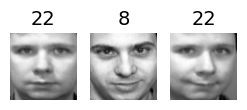

Cluster 12


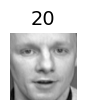

Cluster 13


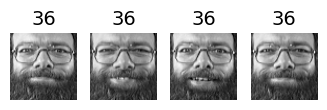

Cluster 14


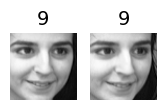

Cluster 15


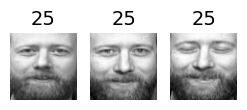

Cluster 16


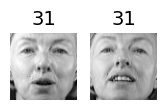

Cluster 17


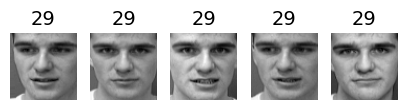

Cluster 18


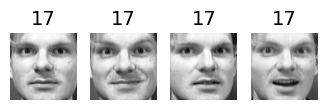

Cluster 19


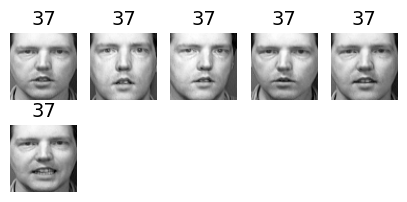

Cluster 20


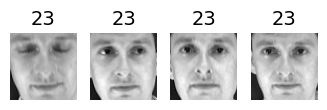

Cluster 21


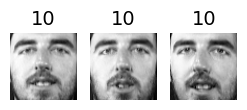

Cluster 22


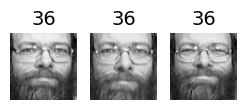

Cluster 23


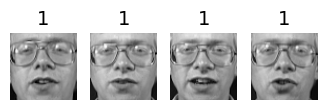

Cluster 24


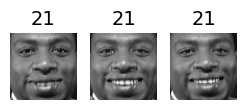

Cluster 25


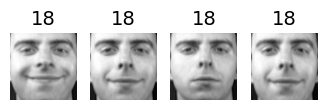

Cluster 26


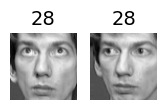

Cluster 27


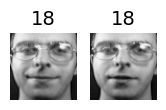

Cluster 28


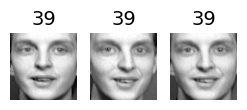

Cluster 29


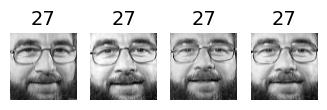

Cluster 30


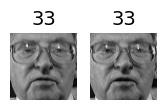

Cluster 31


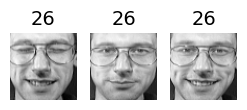

Cluster 32


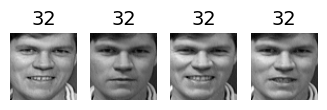

Cluster 33


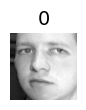

Cluster 34


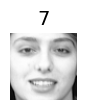

Cluster 35


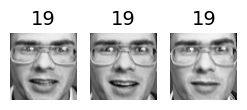

Cluster 36


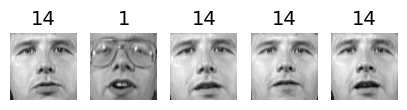

Cluster 37


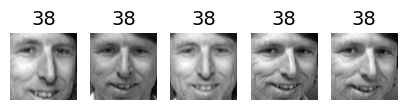

Cluster 38


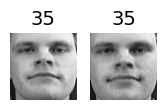

Cluster 39


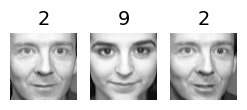

Cluster 40


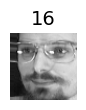

Cluster 41


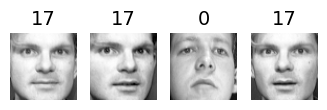

Cluster 42


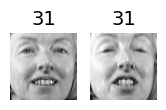

Cluster 43


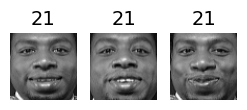

Cluster 44


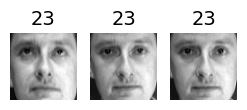

Cluster 45


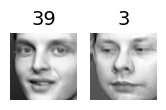

Cluster 46


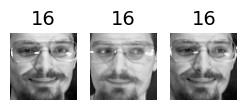

Cluster 47


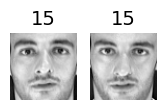

Cluster 48


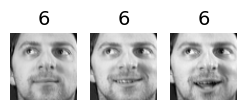

Cluster 49


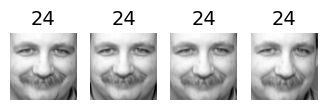

Cluster 50


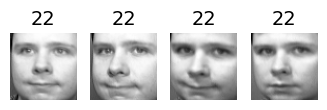

Cluster 51


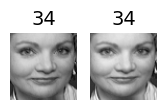

Cluster 52


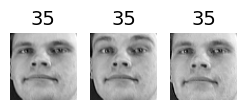

Cluster 53


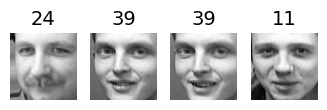

Cluster 54


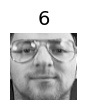

Cluster 55


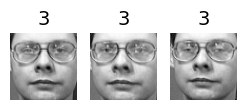

Cluster 56


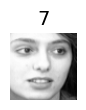

Cluster 57


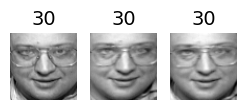

Cluster 58


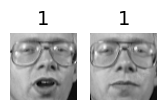

Cluster 59


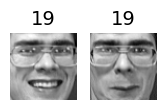

Cluster 60


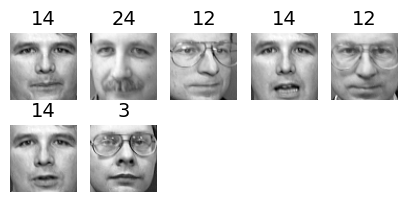

Cluster 61


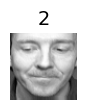

Cluster 62


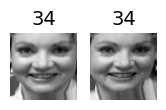

Cluster 63


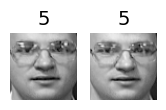

Cluster 64


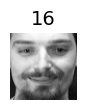

Cluster 65


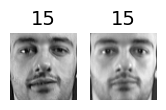

Cluster 66


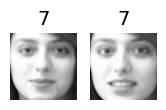

Cluster 67


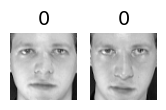

Cluster 68


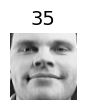

Cluster 69


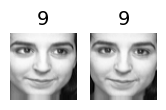

Cluster 70


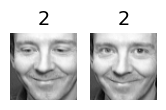

Cluster 71


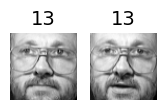

Cluster 72


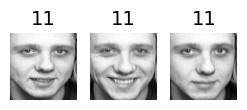

Cluster 73


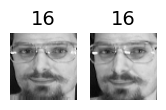

Cluster 74


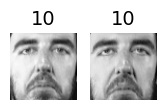

Cluster 75


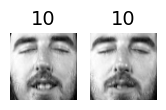

Cluster 76


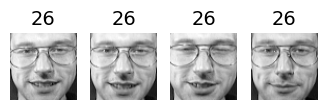

Cluster 77


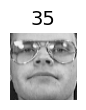

Cluster 78


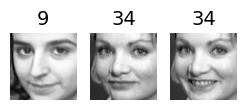

Cluster 79


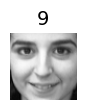

Cluster 80


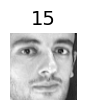

Cluster 81


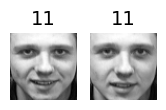

Cluster 82


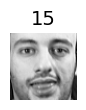

Cluster 83


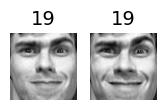

Cluster 84


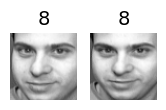

Cluster 85


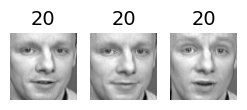

Cluster 86


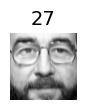

Cluster 87


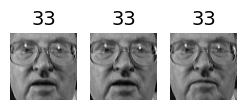

Cluster 88


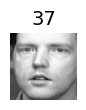

Cluster 89


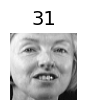

Cluster 90


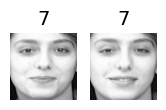

Cluster 91


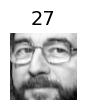

Cluster 92


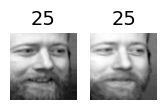

Cluster 93


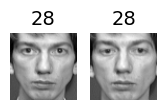

Cluster 94


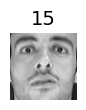

Cluster 95


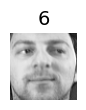

Cluster 96


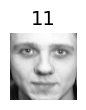

Cluster 97


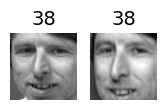

Cluster 98


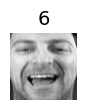

Cluster 99


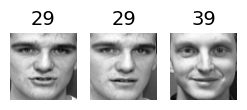

Cluster 100


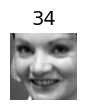

Cluster 101


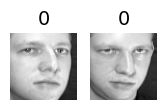

Cluster 102


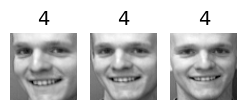

Cluster 103


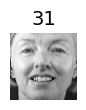

Cluster 104


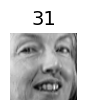

Cluster 105


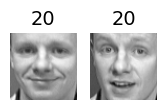

Cluster 106


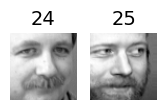

Cluster 107


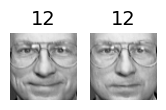

Cluster 108


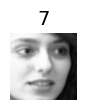

Cluster 109


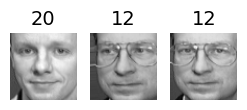

Cluster 110


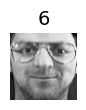

Cluster 111


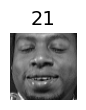

Cluster 112


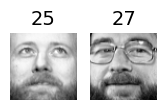

Cluster 113


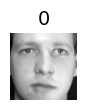

Cluster 114


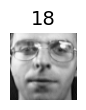

In [130]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture.

Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

## 11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9375

In [132]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.7125

We could use a `GridSearchCV` like we did earlier in this notebook, but since we already have a validation set, we don't need K-fold cross-validation, and we're only exploring a single hyperparameter, so it's simpler to just run a loop manually:

In [133]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.4875
15 0.5875
20 0.6125
25 0.6375
30 0.6125
35 0.7125
40 0.6875
45 0.7375
50 0.725
55 0.725
60 0.725
65 0.7
70 0.7125
75 0.7375
80 0.7625
85 0.7
90 0.75
95 0.75
100 0.75
105 0.7625
110 0.75
115 0.7125
120 0.7875
125 0.7625
130 0.75
135 0.7625
140 0.7125
145 0.725


Oh well, even by tuning the number of clusters, we never get beyond 80% accuracy. Looks like the distances to the cluster centroids are not as informative as the original images.

In [134]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [135]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8

That's a bit better, but still worse than without the cluster features. The clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances).

## 12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

In [136]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [137]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

C:\Users\roush\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\mixture\_base.py:468: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  rng.multivariate_normal(mean, covariance, int(sample))


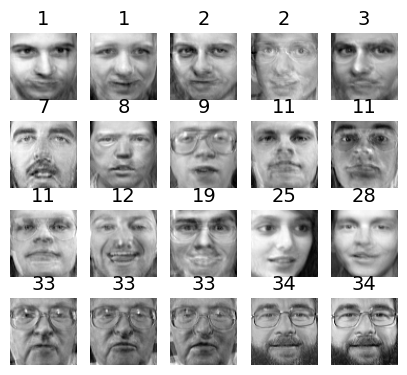

In [138]:
plot_faces(gen_faces, y_gen_faces)

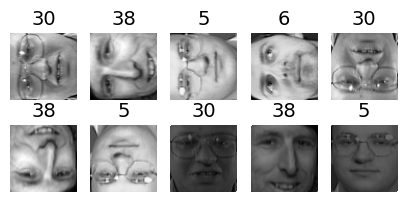

In [139]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [140]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [141]:
gm.score_samples(X_bad_faces_pca)

array([-1.8815894e+07, -1.7374284e+07, -4.1175384e+07, -4.7886460e+07,
       -3.1926188e+07, -1.3396150e+07, -2.9794000e+07, -9.2701784e+07,
       -1.0286705e+08, -5.4346976e+07], dtype=float32)

In [142]:
gm.score_samples(X_train_pca[:10])

array([1162.7074, 1111.8285, 1155.975 , 1170.5385, 1073.4841, 1139.5056,
       1113.6196, 1073.4841, 1048.1104, 1048.1104], dtype=float32)

## 13. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [143]:
X_train_pca.round(2)
# we already have reduced it

array([[ -3.78,   1.85,  -5.14, ...,   0.14,  -0.21,   0.06],
       [-10.15,   1.53,  -0.77, ...,  -0.12,  -0.14,  -0.02],
       [ 10.02,  -2.88,  -0.92, ...,  -0.07,  -0.  ,   0.12],
       ...,
       [ -2.48,  -2.96,   1.3 , ...,   0.02,   0.03,  -0.15],
       [  3.22,  -5.35,   1.39, ...,  -0.06,  -0.23,   0.16],
       [  0.92,   3.65,   2.26, ...,  -0.14,  -0.07,   0.06]],
      shape=(280, 199), dtype=float32)

In [144]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [145]:
reconstruction_errors(pca, X_train).mean()

np.float32(0.0001920535)

In [146]:
reconstruction_errors(pca, X_bad_faces).mean()

np.float32(0.004707354)

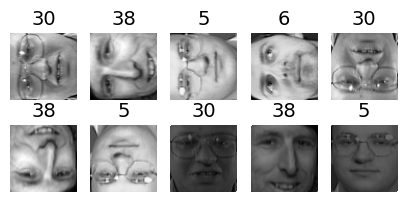

In [147]:
plot_faces(X_bad_faces, y_bad)

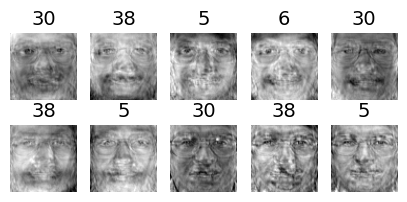

In [148]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)